# Time Series Forecasting of U.S. Hass Avocado Sales

Submitted by William J Townsend, Student ID 003397146, Capstone for WGU's MSDA program

## Table of Contents
<ul>
<li><a href="#PartA">A: Research Question</a></li>
<li><a href="#PartB">B: Data Collection</a></li>
<li><a href="#PartC">C: Data Extraction and Preparation</a></li>
<li><a href="#PartC1">C1: Exploratory Data Analysis</a></li>
<li><a href="#PartD">D: Time Series Analysis & Forecasting</a></li>
<li><a href="#PartE">E: Data Summary and Implications</a></li>
<li><a href="#PartF">F: Source References</a></li>     
<li><a href="#PartG">G: Code References</a></li>    
</ul>

<a id='PartA'></a>
## A: Research Question

The research question for this capstone project is "Can sales of conventional Hass avocados in the United States be effectively forecasted based solely on the research data?" 

Hass avocados are a popular fruit sold throughout the United States, commonly associated with Tex-Mex food in the western United States. In the United States, the [Hass Avocado Board](https://hassavocadoboard.com/) is a trade group that works to “help make avocados America’s most popular fruit”, and to this end, they publish a variety of supply and market data for both growers and marketers. The Hass Avocado Board releases a small portion of its data to the public, and they [encourage the public to work with their data for research purposes](https://hassavocadoboard.com/webinar/insider-tips-for-leveraging-habs-free-data-and-research/), such as this project.  

With the limited dataset that they provide to the public, data is available for 2020 - 2022 regarding both the average sale price of Hass avocados on a per-pound basis and the volume of Hass avocado sales in pounds, broken into different avocado products as well as by organic and conventional (not-organic) types of Hass avocados. With this data, forecasts can be built that suit business interests by giving an idea of the United States’ appetite for purchasing Hass avocados throughout the year. A successful forecast will have benefits to any entity in the chain from farm to grocer in its display of nationwide product demand. From a more personal perspective, as someone who lives in the Western US and regularly enjoys Tex-Max food and avocados in particular, this made for a fun project that satisfied the requirement to be business-oriented while being both easily translatable to other business fields and easily understandable by hiring entities. 

For the purposes of this analysis, we have established the following null and alternative hypotheses:

**Null hypothesis:** An effective predictive time series forecasting model with a mean absolute percentage error of <20% can *not* be generated from the research dataset. <br>
**Alternative hypothesis:** An effective predictive time series forecasting model with a mean absolute percentage error of <20% can be generated from the research dataset.

For the purposes of distinguishing what constitutes an effectively predictive time series forecasting model as it pertains to confirming or rejecting the null hypothesis, a final optimized model must have a mean absolute percentage error (MAPE) of 20% or less for its forecast of the 2022 test data in order to be deemed "effective". If an effective model is generated, it will then be used to generate a similar forecast for Hass avocado sales over 2023 as well. 

<a id='PartB'></a>
## B: Data Collection

The data for this project was collected from [the Category Data page on the Hass Avocado Board's website](https://hassavocadoboard.com/category-data/). This page consists of a number of dashboards with a variety of information types from the Hass Avocado Board, including many that use information which is not published and released to the public. When selecting a year for these dashboards, in the bottom right of these dashboards the user is given the opportunity to download that year's Weekly Retail Volume & Price Report. These reports are only available for the years 2020, 2021, and 2022. I reached out the Hass Avocado Board using their contact information to try to procure additional data for prior years, but I did not receive a response. 

Each year's data consists of over 6,000 observations, documenting on a weekly basis the following data:
- Geographical Area: This is the area of the observation, which may be one of 50 markets, one of eight regions, or the Total U.S. data. 
- Timeframe: The frequency of the data gathering. For every datapoint in this dataset, this is "weekly". 
- Type: This distinguishes whether the observation is for organic or conventional Hass avocados. 
- Week Ending (date): This is the "week ending" date, reflecting that the observation is for the preceding week which ended on this date. 
- Average Sale Price: This is the average price in USD per pound for Hass avocados in that observation (region, date, type). This sale price is not tied to an individual avocado product, but instead is an average of all avocado products. 
- Total Bulk Units (lbs): This is the volume of bulk Hass avocado sales, in pounds. Bulk sales are generally bagged and consist of a single sale "unit". 
- Individual Units of Small Avocados (lbs): This is the volume of sales, in pounds, of individual small Hass avocados, such as if you went to the store and picked up 2 or 3 avocados. 
- Individual Units of Large Avocados (lbs): This is the volume of sales, in pounds, of individual large Hass avocados.
- Individual Units of X-Large Avocados (lbs): This is the volume of sales, in pounds, of individual x-large Hass avocados. 

All three years of data were concatenated into a full dataset that contained weekly data from 5 Jan 2020 to 25 Dec 2022, totalling over 18,000 rows. 

The primary advantage of this data gathering methodology is that it is both simple and authoritative. The data is downloaded as a separate .csv file for each year, which is very easy to open up and load into a dataframe with pandas' `read_csv()` function. This is a baseline function of one of the most popular data science packages, meaning that myself or anyone attempting to perform a related analysis can immediately load up and start manipulating this data with only two lines of code: the pandas import and the reading of the csv file. The Hass Avocado Board works directly with growers and marketers, compiling a large amount of data related to both the supply side and the demand side of domestic avocado sales. As a result, the data they publish can be considered quite authoritative. While not impossible, it would be exceedingly difficult for someone to claim that either the HAB's data is inaccurate or that their own data is more accurate, 

The primary disadvantage of this data methodology is that I am largely at the mercy of what the Hass Avocado Board chooses to provide to me. The Hass Avocado Board does not publish a lot of data, with no supplier data in the set at all, and even amongst what is published, they do not publish a data dictionary to clarify elements of what data they do publish. For example, the published value of "Units" in in "Total Bulk and Bags Units" or "4046 Units" isn't very clear. To read the heading alone, this could sound like a number of sold units, like 1 bag of avocados or 1 PLU 4046 avocado. However, the values are floating point numbers with fractional elements, and it is impossible to sell .25 of an avocado. 

I was able to infer that this value was actually a volume in pounds, because of consistencies in the data between the dashboards that the Hass Avocado Board publishes and their published datasets. This then led to uncertainty if these measures were actually in individual pounds (1,234.56 pounds represented as 1234.56) or in a scale such as thousands of pounds (1,234.56 pounds represented as 1.23), which might be more commonly expected for the scope of this dataset. In the end, given that nothing in the Hass Avocado Board's documentation indicated anything other than individual pounds, I had to assume the volumes provided were in individual pounds, though I must acknowledge that this is an assumption on my part due to a lack of clarity on their part. 

I attempted to contact the Hass Avocado Board using their provided contact information on their website (HABMEDIA@mslgroup.com) to request a data dictionary or some clarifications about the data, explaining that I was a data science student using their datasets for a project. Unfortunately, I did not receive any response from the Hass Avocado Board. I did do some additional sleuthing to try to gather direct contact information for their Senior Business Insights and Data Services Manager, Alejandro Gavito, in the hopes that appealing to someone likely to be in charge of and knowledgeable about that data would be able to answer my questions. I was again unsuccessful in that regard. I was able to find some of the clarifications I needed buried in the errata of their own published reports, such as the clarification that the "ASP" terminology that they use in their datasets refers to the "average sale price", and that this value is actually a per-pound measure. Given the lack of response, there were some variables available in the dataset that I chose not to work with because I could not be sure what they even were, such as "Bulk GTIN". 

Regarding challenges with the data, there were not any challenges with *collecting* the data, which is the specification made by the rubric. There was one significant challenge with preparing the data, however. The dataset is complete and generally very well put together, with one particular issue. The 2022 data appears to be missing the data for the 11 Dec 2022, containing weekly data for 4 Dec and 18 Dec, without any acknowledgement that the 11 Dec data is missing. I elected to settle on addressing this by generating the 11 Dec 2022 data myself by taking the midpoint of the 4 Dec and 18 Dec datapoints for each variable. This had to be done for each of the 59 geographic areas distinguished in the dataset, which ended up making this a surprisingly complex problem to address. 

<a id='PartC'></a>
## C: Data Extraction and Preparation

As this is being submitted in Jupyter Notebook format, all of my data extraction and preparation processes are provided here, in full, and my code has been commented to offer clarity regarding my handling of the data, with occasional narratives added in markdown where necessary. This is intended to describe my data preparation process in full detail. I've also included my exploratory data analysis, despite it not being required for this assignment, both to be complete in my presentation and because some conclusions from that inform the approach of the final analysis. 

The rubric requires that I explain the tools and techniques used for data extraction and data preparation, including one advantage and disadvantage of each for this process. While more packages and tools were used in the final analysis, this is the list of tools and techniques used specifically in this extraction/preparation process:
- Python programming (Anaconda environment)
- Jupyter Notebook (Anaconda environment)
- The following Python libraries:
    - pandas
    - NumPy
    - MatPlotLib
    
Python is a useful and robust programming language to perform this data analysis. It also happens to be the programming language that I personally know. The primary disadvantage of Python is that it is a high level programming language that [can be slower than other languages when it comes to execution](https://pythonistaplanet.com/disadvantages-of-python/#:~:text=The%20main%20disadvantages%20of%20Python%20are%20its%20slowness%20during%20execution,in%20the%20enterprise%20development%20sector.). 

Anaconda as an environment manager is useful because it creates a convenient GUI for the installation/uninstallation of different Python packages and manages interactions between various elements of my programming environment for me. A disadvantage of Anaconda is that its GUI often appears to hang during package installs, uninstalls, downgrades, upgrades, or other tasks, which often pushes me into using the command line interface anyways. This was a running issue throughout the development of this project. 

Jupyter Notebook is a fantastic tool for working on a project like this, especially in its early preparation stages, because it allows for a very quickly iterative process. It is quite common for me to end up writing a cell of code that doesn't quite work, or works in a way that isn't quite what I want, and to maintain that cell as a copy and to start using a new cell as a place to iterate on that code, so I can compare behavior between two different cells of code. This also lets me easily open a new cell to display or extract a piece of the data to see exactly what its doing or what it looks like, and then once I know I have things working appropriately, I can eliminate those unnecessary cells that were used for debugging, creating a finalized look that is cleaner and more professional. The primary disadvantage of Jupyter is that it can also be slow in its operation. This was also a running issue throughout the development of this project, especially in the course of trying to develop multiple forecasting models. 

The pandas Python library allows me to place all of the data into a dataframe, which is essentially a large table or spreadsheet that supports complex operations. This makes it easy to manipulate and view the data for the purposes of extracting and preparing it. Pandas syntax can become cumbersome as you begin doing more complex operations, and this was especially evident in the process of addressing the missing 11 Dec 2022 data explained above. The process of filling in this data amounted to a very large CASE statement based on a series of if/then conditionals to search for values and perform operations to generate new rows with new data in the dataset. In the end, the easiest approach for this problem was to build a rather lengthy customized piece of iterative code to accomplish my task, rather than trying to find a vectorized solution within pandas. 

NumPy isn't directly used in this data preparation process much, but it is an important tool to include. NumPy is used by other packages, including pandas and MatPlotLib, to perform a variety of mathematical operations. As a result, NumPy is infrequently called explicitly by me, but it is commonly used "under the hood" by other operations without my knowledge. In this case, NumPy was primarily used for calculating the mean of certain values and for creating "best fit" lines in some of the graphs during the exploratory data analysis. One disadvantage of NumPy is that there is a known issue within `pmdarima` for attempting to generate an `auto_arima()` function that inadvertently creates NaN values that end up causing the automated arima function to fail, and this problem actually stems from a particular handling of an operation by NumPy. This was a problem that killed a full day of work for me, before I finally sought out alternatives to `pmdarima` that actually led me to `prophet`, which worked out much better in the end. 

MatPlotLib is used for generating figures and graphs, and many other Python libraries make use of it for these tasks, similar to how other libraries use NumPy without the user's direct knowledge. MatPlotLib makes it easy to generate good looking and intuitive plots of the data, as demonstrated throughout the exploratory data analysis. The disadvantage of MatPlotLib is that it can be rather fiddly or make odd formatting choices that are difficult to correct. For example, at one point in my exploratory data analysis, I could not create a line graph and a pie chart as a side-by-side (1 row/2 column) figure, as the pie chart would always get pushed to the next row. In the end, I had to capitulate to MatPlotLib's inexplicable insistence on making this a 2 row/1 column figure, and it's left-alignment of the pie chart. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pmdarima as pm
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

Importing plotly failed. Interactive plots will not work.


In [2]:
# Read the year's data into a dataframe from CSV
df_2022 = pd.read_csv('./2022-plu-total-hab-data.csv', parse_dates=['Current Year Week Ending'])
# Check data types and number of values, as well as overall size of dataframe
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Geography                  6137 non-null   object        
 1   Timeframe                  6136 non-null   object        
 2   Current Year Week Ending   6136 non-null   datetime64[ns]
 3   Type                       6136 non-null   object        
 4   ASP Current Year           6136 non-null   float64       
 5   Total Bulk and Bags Units  6136 non-null   float64       
 6   4046 Units                 6136 non-null   float64       
 7   4225 Units                 6136 non-null   float64       
 8   4770 Units                 6136 non-null   float64       
 9   TotalBagged Units          6136 non-null   float64       
 10  SmlBagged Units            0 non-null      float64       
 11  LrgBagged Units            0 non-null      float64       
 12  X-LrgB

In [3]:
# Read the year's data into a dataframe from CSV
df_2021 = pd.read_csv('./2021-plu-total-hab-data.csv', parse_dates=['Current Year Week Ending'])
# Check data types and number of values, as well as overall size of dataframe
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Geography                  6137 non-null   object        
 1   Timeframe                  6136 non-null   object        
 2   Current Year Week Ending   6136 non-null   datetime64[ns]
 3   Type                       6136 non-null   object        
 4   ASP Current Year           6136 non-null   float64       
 5   Total Bulk and Bags Units  6136 non-null   float64       
 6   4046 Units                 6136 non-null   float64       
 7   4225 Units                 6136 non-null   float64       
 8   4770 Units                 6136 non-null   float64       
 9   TotalBagged Units          6136 non-null   float64       
 10  SmlBagged Units            0 non-null      float64       
 11  LrgBagged Units            0 non-null      float64       
 12  X-LrgB

In [4]:
# Read the year's data into a dataframe from CSV
df_2020 = pd.read_csv('./2020-plu-total-hab-data.csv', parse_dates=['Current Year Week Ending'])
# Check data types and number of values, as well as overall size of dataframe
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Geography                  6137 non-null   object        
 1   Timeframe                  6136 non-null   object        
 2   Current Year Week Ending   6136 non-null   datetime64[ns]
 3   Type                       6136 non-null   object        
 4   ASP Current Year           6136 non-null   float64       
 5   Total Bulk and Bags Units  6136 non-null   float64       
 6   4046 Units                 6136 non-null   float64       
 7   4225 Units                 6136 non-null   float64       
 8   4770 Units                 6136 non-null   float64       
 9   TotalBagged Units          6136 non-null   float64       
 10  SmlBagged Units            6136 non-null   float64       
 11  LrgBagged Units            6136 non-null   float64       
 12  X-LrgB

In [5]:
# The last line in each table is the classic small print at the bottom of an industrial data release. 
df_2022.tail(3)

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
6134,West Tex/New Mexico,Weekly,2022-12-31,Organic,0.936702,38393.52,603.61,146.13,0.0,27471.97,NaN,NaN,NaN,10171.81
6135,Wichita,Weekly,2022-12-31,Organic,1.281421,2214.35,350.04,2.12,0.0,830.42,NaN,NaN,NaN,1031.77
6136,Source: IRI confidential information. HAB's ca...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop that from each of the three datasets
df_2022 = df_2022.drop(df_2022.index[-1])
df_2021 = df_2021.drop(df_2021.index[-1])
df_2020 = df_2020.drop(df_2020.index[-1])

In [7]:
df_2020.tail()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
6131,Total U.S.,Weekly,2020-11-29,Organic,1.606888,1247900.31,62024.73,87673.31,2051.15,702545.23,0.0,0.0,0.0,393605.90
6132,Total U.S.,Weekly,2020-12-06,Organic,1.554793,1644822.77,77793.42,205558.21,3089.50,876588.61,0.0,0.0,0.0,481793.04
6133,Total U.S.,Weekly,2020-12-13,Organic,1.529047,1557067.45,74994.68,161891.35,2324.50,895281.69,0.0,0.0,0.0,422575.23
6134,Total U.S.,Weekly,2020-12-20,Organic,1.555740,1471870.08,80196.14,120040.24,2648.92,844010.96,0.0,0.0,0.0,424973.81
6135,Total U.S.,Weekly,2020-12-27,Organic,1.507964,1418951.82,73373.88,113176.26,2413.28,805431.54,0.0,0.0,0.0,424556.87


Something important that wasn't initially apparent upon the exploratory data analysis but was revealed upon trying to do later parts of this analysis is that the "Current Year Week Ending" dates are not *actually* weekly, as they appear to be. For all three years of data, every measurement is represented as occurring on Sunday at 00:00. This is consistent across each of the three years of data, but in all three years, the first measurement doesn't occur on Sunday at 00:00 but instead the first Monday of the year at 00:00:
- Row 1 of 2020's data occurs on 6 Jan 2020, making a 6-day week to the next observation on 12 Jan 2020
- Row 1 of 2021's data occurs on 4 Jan 2020, making a 6-day week to the next observation on 10 Jan 2020
- Row 1 of 2022's data occurs on 3 Jan 2020, making a 6-day week to the next observation on 9 Jan 2020

Not having a consistent frequency prevents us from using certain elements of time series analysis later on, so these issues need to be corrected. These three issues can all be corrected relatively simply, by just replacing the offending date with the "correct" one. It isn't clear if this is an issue where the data is simply initialized incorrectly (and habitually) by the Hass Avocado Board, or if this is genuinely reflecting 6 days of data before beginning to track weekly on Sundays. If it is a mistake, then this will have no effect on the data. If it is actually deliberate, this is a very strange choice on their part, and changing these dates may cause some slight inaccuracies in the data because this would represent the first week of the year (i.e. 5 Jan 2020 - 12 Jan 2020) as containing 7 days worth of sales when it only contained six. If this is the case, I do not find it to be a troublesome issue, given that the magnitude would be relatively small (1/7th of the data for that week would be missing), especially over the scope of the data (that 1/7th of the data missing would be happening in 1/52nd of the data). Further observations from this study also indicate that December and early January are the low-point for Hass avocado sales annually, which further minimizes the magnitude of any harm that this correction may cause. 

In [8]:
# Fix the row 1 date problem here for all three of those frames
df_2020.loc[df_2020["Current Year Week Ending"] == pd.to_datetime("2020-01-06"), "Current Year Week Ending"] = pd.to_datetime("2020-01-05")
df_2021.loc[df_2021["Current Year Week Ending"] == pd.to_datetime("2021-01-04"), "Current Year Week Ending"] = pd.to_datetime("2021-01-03")
df_2022.loc[df_2022["Current Year Week Ending"] == pd.to_datetime("2022-01-03"), "Current Year Week Ending"] = pd.to_datetime("2022-01-02")
# Verify that earliest date seen in df_2020 is now 5 Jan 2020 instead of 6 Jan 2020
df_2020.head(3)

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
0,Albany,Weekly,2020-01-05,Conventional,1.155100,161726.12,3737.00,140642.19,184.16,10996.65,0.0,0.0,0.0,6166.13
1,Albany,Weekly,2020-01-12,Conventional,1.227609,116738.30,3649.24,90717.11,203.78,16359.88,0.0,0.0,0.0,5808.29
2,Albany,Weekly,2020-01-19,Conventional,1.088107,138162.91,5057.86,108635.20,306.59,15879.12,0.0,0.0,0.0,8284.13


At this point, 35 of the 36 months of data are correctly fixed to represent a weekly sampling on Sundays at 00:00 throughout 2020 - 2022. Another issue was found that prevents pandas from reading the weekly data as having a weekly frequency. In the 2022 dataset, the observations for 11 Dec 2022 are missing for all locations. As a result, the data jumps from 4 Dec 2022 to 18 Dec 2022, with no accounting for the observations on 11 Dec 2022. 

There are many ways to correct this issue, including truncating the dataset to end on 4 Dec 2022. I elected to calculate a midpoint of the 4 Dec 2022 and 18 Dec 2022 and and then use those generated datapoints to replace the missing 11 Dec 2022 data. For example, the average sale price of organic Hass avocados in Denver on 4 Dec 2022 was 0.978842, and the price was 0.980697 in 18 Dec 2022, so the price on 11 Dec 2022 was calculated to be 0.979769 (the mean of the two values). This process was done for each location/type combination in the 2022 dataset. 

In [9]:
# Initialize a list to store dictionaries of data in
list_of_dicts = []
print(f"Beginning iteration through {len(df_2022.Geography.value_counts().index)} locations to calculate data for 11 Dec 2022")
# Start iterating through each location in the dataset
for location in df_2022.Geography.value_counts().index:
    # Find indexes of the rows for this location and organic/conventional type for the 4 Dec 2022 (before)
    org_x = df_2022[(df_2022["Geography"] == location) & 
                      (df_2022["Current Year Week Ending"] == pd.to_datetime("2022-12-04")) & 
                      (df_2022["Type"] == "Organic")].index[0]
    con_x = df_2022[(df_2022["Geography"] == location) & 
                      (df_2022["Current Year Week Ending"] == pd.to_datetime("2022-12-04")) & 
                      (df_2022["Type"] == "Conventional")].index[0]
    # Gather needed before/organic and before/conventional data into variables
    o_x_price, o_x_bulk, o_x_4046, o_x_4225, o_x_4770 = df_2022.loc[org_x][4], df_2022.loc[org_x][5], df_2022.loc[org_x][6], df_2022.loc[org_x][7], df_2022.loc[org_x][8]
    c_x_price, c_x_bulk, c_x_4046, c_x_4225, c_x_4770 = df_2022.loc[con_x][4], df_2022.loc[con_x][5], df_2022.loc[con_x][6], df_2022.loc[con_x][7], df_2022.loc[con_x][8]
    # Find indexes of the rows for this location and organic/conventional type for the 18 Dec 2022 (after)
    org_z = df_2022[(df_2022["Geography"] == location) & 
                      (df_2022["Current Year Week Ending"] == pd.to_datetime("2022-12-18")) & 
                      (df_2022["Type"] == "Organic")].index[0]
    con_z = df_2022[(df_2022["Geography"] == location) & 
                      (df_2022["Current Year Week Ending"] == pd.to_datetime("2022-12-18")) & 
                      (df_2022["Type"] == "Conventional")].index[0]
    # Gather needed before/organic and before/conventional data into variables
    o_z_price, o_z_bulk, o_z_4046, o_z_4225, o_z_4770 = df_2022.loc[org_z][4], df_2022.loc[org_z][5], df_2022.loc[org_z][6], df_2022.loc[org_z][7], df_2022.loc[org_z][8]
    c_z_price, c_z_bulk, c_z_4046, c_z_4225, c_z_4770 = df_2022.loc[con_z][4], df_2022.loc[con_z][5], df_2022.loc[con_z][6], df_2022.loc[con_z][7], df_2022.loc[con_z][8]
    # Calculate the values of the missing data for 11 Dec 2022 (y) by finding the midpoint of the before (x) and after (z) data
    o_y_price, o_y_bulk, o_y_4046, o_y_4225, o_y_4770 = np.mean([o_x_price, o_z_price]), np.mean([o_x_bulk, o_z_bulk]), np.mean([o_x_4046, o_z_4046]), np.mean([o_x_4225, o_z_4225]), np.mean([o_x_4770, o_z_4770])

    c_y_price, c_y_bulk, c_y_4046, c_y_4225, c_y_4770 = np.mean([c_x_price, c_z_price]), np.mean([c_x_bulk, c_z_bulk]), np.mean([c_x_4046, c_z_4046]), np.mean([c_x_4225, c_z_4225]), np.mean([c_x_4770, c_z_4770])
    # Generate temporary dictionaties containing all of the given and calculated y data for 11 Dec 2022
    o_temp_dict = {"Geography" : location, "Timeframe" : "Weekly", "Current Year Week Ending" : pd.to_datetime("2022-12-11"), 
                   "Type" : "Organic", "ASP Current Year" : o_y_price, "Total Bulk and Bags Units" : o_y_bulk, 
                   "4046 Units" : o_y_4046, "4225 Units" : o_y_4225, "4770 Units" : o_y_4770}
    c_temp_dict = {"Geography" : location, "Timeframe" : "Weekly", "Current Year Week Ending" : pd.to_datetime("2022-12-11"), 
                   "Type" : "Conventional", "ASP Current Year" : c_y_price, "Total Bulk and Bags Units" : c_y_bulk, 
                   "4046 Units" : c_y_4046, "4225 Units" : c_y_4225, "4770 Units" : c_y_4770}
    # Append each dictionary to the list of dictionaries
    list_of_dicts.append(o_temp_dict)
    list_of_dicts.append(c_temp_dict)
# Once list is filled with 2 dictionaries for each location (one organic, one conventional), verify length of list
print(f"The list contains {len(list_of_dicts)} elements ready to be appended to the dataframe.")
# Generate a temp dataframe from the list and then append it to the 2022 dataframe
temp_df = pd.DataFrame(list_of_dicts)
df_2022 = pd.concat([df_2022, temp_df], ignore_index = True)
# Verify correct implementation by checking a location's December values to ensure 11 Dec represents midpoint of 4 & 18 Dec
df_2022[(df_2022["Geography"] == "Denver") & (df_2022["Type"] == "Conventional") &
        (df_2022["Current Year Week Ending"].dt.month == 12)]

Beginning iteration through 59 locations to calculate data for 11 Dec 2022
The list contains 118 elements ready to be appended to the dataframe.


,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
5358,Denver,Weekly,2022-12-04,Conventional,0.978842,938730.590,143702.85,77921.800,2185.79,205557.80,NaN,NaN,NaN,509362.35
5795,Denver,Weekly,2022-12-18,Conventional,0.980697,872283.460,148826.01,75798.750,2548.23,226814.59,NaN,NaN,NaN,418295.89
5913,Denver,Weekly,2022-12-25,Conventional,0.984643,944959.580,146189.45,101597.970,2333.97,242681.74,NaN,NaN,NaN,452156.45
6031,Denver,Weekly,2022-12-31,Conventional,0.847346,970973.800,144727.53,106875.270,2628.79,236588.96,NaN,NaN,NaN,480153.26
6221,Denver,Weekly,2022-12-11,Conventional,0.979769,905507.025,146264.43,76860.275,2367.01,NaN,NaN,NaN,NaN,NaN


With that issue fixed, one final problem exists with the frequency of the dates in this data, again with the 2022 dataset. With the 11 Dec 2022 data inserted, the entire dataset unfolds weekly on Sundays, until the very end of the year, when an extra "week" is generated on Saturday, 31 Dec 2022 at 00:00. This ends up generating another 6 day week at the end of the year. Because this data cannot be moved to the "correct" date without pushing it out of the intended timeframe of this study (unlike the data at the beginning of each year could be), this data will be omitted from the dataset. 

In [10]:
# Isolate the dates to be gotten rid of
bad_dates = df_2022[(df_2022["Current Year Week Ending"] == pd.to_datetime("2022-12-31"))]
# Re-Instantiate df_2022 without any of the values that were in the "bad dates" dataframe
df_2022 = df_2022[~df_2022.isin(bad_dates)]
# Somehow, that kept NaNs for the bad dates, so drop rows with NaN Geography
df_2022 = df_2022[df_2022['Geography'].notna()]
# With new rows added that should be ordered but aren't, and other rows deleted, re-sort & re-index the dataset 
df_2022 = df_2022.sort_values(by=['Geography', 'Type', 'Current Year Week Ending']).reset_index(drop=True)
# Verify that 31-Dec-2022 dates no longer show up
df_2022[(df_2022["Geography"] == "Denver") & (df_2022["Type"] == "Conventional") &
        (df_2022["Current Year Week Ending"].dt.month == 12)]

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
1400,Denver,Weekly,2022-12-04,Conventional,0.978842,938730.590,143702.85,77921.800,2185.79,205557.80,NaN,NaN,NaN,509362.35
1401,Denver,Weekly,2022-12-11,Conventional,0.979769,905507.025,146264.43,76860.275,2367.01,NaN,NaN,NaN,NaN,NaN
1402,Denver,Weekly,2022-12-18,Conventional,0.980697,872283.460,148826.01,75798.750,2548.23,226814.59,NaN,NaN,NaN,418295.89
1403,Denver,Weekly,2022-12-25,Conventional,0.984643,944959.580,146189.45,101597.970,2333.97,242681.74,NaN,NaN,NaN,452156.45


In [11]:
# 2022 & 2021 don't use the bagged unit columns, but 2020 looks like it does - check out the values
print(df_2020['SmlBagged Units'].value_counts())
print(df_2020['LrgBagged Units'].value_counts())
print(df_2020['X-LrgBagged Units'].value_counts())

0.0    6136
Name: SmlBagged Units, dtype: int64
0.0    6136
Name: LrgBagged Units, dtype: int64
0.0    6136
Name: X-LrgBagged Units, dtype: int64


In [12]:
# The timeframe "Weekly" implies that there are other timeframes besides Weekly that we can work with. Check for these. 
print(df_2022.Timeframe.value_counts())
print(df_2021.Timeframe.value_counts())
print(df_2020.Timeframe.value_counts())

Weekly    6136
Name: Timeframe, dtype: int64
Weekly    6136
Name: Timeframe, dtype: int64
Weekly    6136
Name: Timeframe, dtype: int64


In [13]:
# None of the three dataframes use the "x Bagged Units" columns, so we'll drop them
# We also don't need the "Weekly" timeframe label
useful_columns = ['Geography', 'Current Year Week Ending', 'Type', 'ASP Current Year', 
                  'Total Bulk and Bags Units', '4046 Units', '4225 Units', '4770 Units', 'Bulk GTIN']
df_2022 = df_2022[useful_columns]
df_2021 = df_2021[useful_columns]
df_2020 = df_2020[useful_columns]
df_2022.head()

,Geography,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,Bulk GTIN
0,Albany,2022-01-02,Conventional,1.065196,141578.52,47997.58,69240.82,11.15,2305.95
1,Albany,2022-01-09,Conventional,1.197224,128466.26,31710.93,63179.42,13.04,6947.21
2,Albany,2022-01-16,Conventional,1.204902,130741.90,35196.66,62384.39,26.80,5144.05
3,Albany,2022-01-23,Conventional,1.135644,142311.20,37406.10,69887.81,16.75,6532.64
4,Albany,2022-01-30,Conventional,1.077793,155558.98,53539.26,70938.79,8.92,6625.89


In [14]:
# Check the "type" column to see that it simply distinguishes between organic and conventional avocados
print(df_2022['Type'].value_counts())
print(df_2021['Type'].value_counts())
print(df_2020['Type'].value_counts())

Conventional    3068
Organic         3068
Name: Type, dtype: int64
Conventional    3068
Organic         3068
Name: Type, dtype: int64
Conventional    3068
Organic         3068
Name: Type, dtype: int64


In [15]:
# Now we can combine these three avocado dataframes into one tasty dataframe, maybe with some pico de gallo and some jalapenos
avo_df = pd.concat([df_2022, df_2021, df_2020], ignore_index=True)
# Give the new dataframe pythonic column names while we're at it
# Note that the units for the volume of sales (bulk & by PLU) is in pounds, we'll reflect that in the column name
# We'll substitute the item (small, large, x-large) for the PLU numbers, too
new_col_names = ["location", "week_ending", "organic", "average_sale_price", "bulk_Tlbs", "small_Tlbs", 
                 "large_Tlbs", "xlarge_Tlbs", "bulk_gtin"]
avo_df.columns = new_col_names
# Change units of volume from pounds to thousand pounds
avo_df['bulk_Tlbs'] = avo_df['bulk_Tlbs'] / 1000
avo_df['small_Tlbs'] = avo_df['small_Tlbs'] / 1000
avo_df['large_Tlbs'] = avo_df['large_Tlbs'] / 1000
avo_df['xlarge_Tlbs'] = avo_df['xlarge_Tlbs'] / 1000
# Generate a volume sum column
all_avo_columns = ['bulk_Tlbs', 'small_Tlbs', 'large_Tlbs', 'xlarge_Tlbs']
avo_df['vol_sum_Tlbs'] = avo_df[all_avo_columns].sum(axis=1)
# Remap organic column to read True/False instead of Organic/Conventional
avo_df.organic.replace({"Organic" : True, "Conventional" : False}, inplace= True)
# Sort the overall dataset nicely, first by location and then by week ending date for each of organic/conventional
avo_df = avo_df.sort_values(by=['location', 'organic', 'week_ending']).reset_index(drop=True)
# Check outputs with info()
avo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            18408 non-null  object        
 1   week_ending         18408 non-null  datetime64[ns]
 2   organic             18408 non-null  bool          
 3   average_sale_price  18408 non-null  float64       
 4   bulk_Tlbs           18408 non-null  float64       
 5   small_Tlbs          18408 non-null  float64       
 6   large_Tlbs          18408 non-null  float64       
 7   xlarge_Tlbs         18408 non-null  float64       
 8   bulk_gtin           18290 non-null  float64       
 9   vol_sum_Tlbs        18408 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), object(1)
memory usage: 1.3+ MB


In [16]:
# Verify dataframe as expected
avo_df

,location,week_ending,organic,average_sale_price,bulk_Tlbs,small_Tlbs,large_Tlbs,xlarge_Tlbs,bulk_gtin,vol_sum_Tlbs
0,Albany,2020-01-05,False,1.155100,161.72612,3.737000,140.642190,0.18416,6166.13,306.28947
1,Albany,2020-01-12,False,1.227609,116.73830,3.649240,90.717110,0.20378,5808.29,211.30843
2,Albany,2020-01-19,False,1.088107,138.16291,5.057860,108.635200,0.30659,8284.13,252.16256
3,Albany,2020-01-26,False,1.160866,106.20276,4.124560,72.571730,0.27072,7961.90,183.16977
4,Albany,2020-02-02,False,1.251057,186.21093,4.933070,156.256790,0.21529,7492.04,347.61608
...,...,...,...,...,...,...,...,...,...,...
18403,Wichita,2022-11-27,True,1.330938,1.95026,1.191160,0.000000,0.00000,18.85,3.14142
18404,Wichita,2022-12-04,True,1.223280,2.43522,0.522360,0.015960,0.00000,1027.49,2.97354
18405,Wichita,2022-12-11,True,1.255626,2.52073,0.411915,0.011705,0.00000,NaN,2.94435
18406,Wichita,2022-12-18,True,1.287973,2.60624,0.301470,0.007450,0.00000,1412.18,2.91516


In [17]:
# Save cleaned dataset to CSV 
avo_df.to_csv('avocados_2020_2023_clean.csv')

In [18]:
# View all of the possible locations
avo_df.location.value_counts()

Albany                   312
San Diego                312
Orlando                  312
Peoria/Springfield       312
Philadelphia             312
Phoenix/Tucson           312
Pittsburgh               312
Plains                   312
Portland                 312
Providence               312
Raleigh/Greensboro       312
Richmond/Norfolk         312
Roanoke                  312
Sacramento               312
San Francisco            312
Northeast                312
Seattle                  312
South Carolina           312
South Central            312
Southeast                312
Spokane                  312
St. Louis                312
Syracuse                 312
Tampa                    312
Toledo                   312
Total U.S.               312
West                     312
West Tex/New Mexico      312
Northern New England     312
New York                 312
Atlanta                  312
Detroit                  312
Baltimore/Washington     312
Birmingham/Montgomery    312
Boise         

In [19]:
# Generate distinct dataframes for total US data, regions defined by HAB, and then remaining "markets" (cities & small regions)
usa_df = avo_df[avo_df['location'] == 'Total U.S.']
# HAB defines 8 regions: California, West, South Central, Plains, Great Lakes, Southeast, Midsouth, Northeast
regional_df = avo_df[avo_df['location'].astype(str).str.fullmatch("California|West|South Central|Plains|Great Lakes|Southeast|Midsouth|Northeast")]
# Isolate the remaining rows in avo_df (the markets) from the USA and regional values
market_df = avo_df[~avo_df.isin(usa_df)].dropna()
market_df = market_df[~market_df.isin(regional_df)].dropna()
# For what its worth, I did try doing this in a single line, passing a list of dataframes to isin(). It performed much slower.
print(f"Verifying smaller dataframes by comparing to full dataframe...\n")
print(f"USA data consists of {len(usa_df)} rows, regional data of {len(regional_df)} rows, market data of {len(market_df)} rows.")
print(f"Total of all three is {len(usa_df) + len(regional_df) + len(market_df)} rows. Total of full dataset was {len(avo_df)} rows.")
# With no groupings in the set, set usa_df to use date as index
usa_df.set_index('week_ending', inplace=True)
# With all three variations isolated from each other, reset indexes for each of the two remaining dataframes
regional_df.reset_index(inplace=True, drop=True)
market_df.reset_index(inplace=True, drop=True)

Verifying smaller dataframes by comparing to full dataframe...

USA data consists of 312 rows, regional data of 2496 rows, market data of 15500 rows.
Total of all three is 18308 rows. Total of full dataset was 18408 rows.


In [20]:
# Check how many markets there are, to go with the 1 national and 8 regional summaries
print(f"There are {len(market_df.location.value_counts())} distinct markets in the dataset.")
market_df.location.value_counts().sort_index()

There are 50 distinct markets in the dataset.


Albany                   310
Atlanta                  310
Baltimore/Washington     310
Birmingham/Montgomery    310
Boise                    310
Boston                   310
Buffalo/Rochester        310
Charlotte                310
Chicago                  310
Cincinnati/Dayton        310
Columbus                 310
Dallas/Ft. Worth         310
Denver                   310
Detroit                  310
Grand Rapids             310
Harrisburg/Scranton      310
Hartford/Springfield     310
Houston                  310
Indianapolis             310
Jacksonville             310
Las Vegas                310
Los Angeles              310
Louisville               310
Miami/Ft. Lauderdale     310
Nashville                310
New Orleans/Mobile       310
New York                 310
Northern New England     310
Orlando                  310
Peoria/Springfield       310
Philadelphia             310
Phoenix/Tucson           310
Pittsburgh               310
Portland                 310
Providence    

In [21]:
# We can use the dashboard at the HAB website to determine which markets belong to which region, and then add that data
california_markets = ["San Diego", "Sacramento", "Los Angeles", "San Francisco"]
west_markets = ["Portland", "Boise", "Las Vegas", "Seattle", "West Tex/New Mexico", "Phoenix/Tucson", "Denver", "Spokane"]
south_central_markets = ["Dallas/Ft. Worth", "New Orleans/Mobile", "Houston"]
plains_markets = ["St. Louis", "Wichita"]
great_lakes_markets = ["Chicago", "Indianapolis", "Peoria/Springfield", "Columbus", "Toledo", "Grand Rapids", "Cincinnati/Dayton", "Detroit"]
southeast_markets = ["Orlando", "South Carolina", "Atlanta", "Miami/Ft. Lauderdale", "Tampa", "Jacksonville", "Birmingham/Montgomery"]
midsouth_markets = ["Raleigh/Greensboro", "Charlotte", "Richmond/Norfolk", "Baltimore/Washington", "Louisville", "Roanoke", "Nashville"]
northeast_markets = ["Philadelphia", "Harrisburg/Scranton", "Buffalo/Rochester", "New York", "Syracuse", "Albany", "Pittsburgh", "Hartford/Springfield", "Providence", "Boston", "Northern New England"]

# Create a function which will use a list of markets in the region to identify a row (weekly market) as belonging to a region
def regionizer(region_string, list_of_markets_in_region):
    for market in list_of_markets_in_region:
        market_df.loc[market_df['location'] == market, 'region'] = region_string

# Apply the regionizer to the dataframe to generate and fill a new "region" column
regionizer("Northeast", northeast_markets)
regionizer("Midsouth", midsouth_markets)
regionizer("Southeast", southeast_markets)
regionizer("Great Lakes", great_lakes_markets)
regionizer("West", west_markets)
regionizer("California", california_markets)
regionizer("South Central", south_central_markets)
regionizer("Plains", plains_markets)
# Verify outcomes - should be 312 entries for each market placed into a region
print(market_df.region.value_counts())

Northeast        3410
West             2480
Great Lakes      2480
Southeast        2170
Midsouth         2170
California       1240
South Central     930
Plains            620
Name: region, dtype: int64


In [22]:
# Take a look at the values for volume columns in each dataframe
market_df[all_avo_columns].describe()

,bulk_Tlbs,small_Tlbs,large_Tlbs,xlarge_Tlbs
count,15500.000000,15500.000000,15500.000000,15500.000000
mean,280.456964,72.362195,47.969491,3.742355
std,450.224045,131.262667,126.345832,14.933716
min,1.426500,0.000000,0.000000,0.000000
25%,16.649575,0.271020,0.725832,0.000000
50%,91.029610,8.239470,5.906830,0.021185
75%,378.387552,97.667430,42.105252,0.928177
max,4461.087400,1483.060620,1927.042550,303.041740


In [23]:
regional_df[all_avo_columns].describe()

,bulk_Tlbs,small_Tlbs,large_Tlbs,xlarge_Tlbs
count,2496.000000,2496.000000,2496.000000,2496.000000
mean,2534.639234,708.714270,417.712425,33.927952
std,2579.671015,857.749012,682.013150,70.058381
min,27.298930,0.000000,0.000000,0.000000
25%,214.957548,10.674425,13.708092,0.021948
50%,1017.247710,165.094085,114.978375,1.624550
75%,4911.281100,1342.288598,584.322473,26.221340
max,9302.670590,4369.847140,4810.053530,548.427540


In [24]:
usa_df[all_avo_columns].describe()

,bulk_Tlbs,small_Tlbs,large_Tlbs,xlarge_Tlbs
count,312.000000,312.000000,312.000000,312.000000
mean,20277.113876,5669.714158,3341.699398,271.423613
std,18874.748457,5710.979321,3420.411666,302.632720
min,1247.900310,0.000000,0.000000,0.000000
25%,1671.091758,90.291552,112.605328,0.412835
50%,15307.187650,4089.287755,2077.405640,210.509795
75%,38332.942042,10899.778835,6756.324470,496.704917
max,54548.117440,16580.172780,11072.233030,1249.746660


<a id='PartC1'></a>
## C1: Exploratory Data Analysis

With the data now separated neatly into markets (which have their regions identified), regions, and US totals, we can now start doing some exploratory data analysis. 

A few things stick out as being worth looking at:
- Organic vs Conventional avocado purchasing
- Bulk avocado purchasing vs individual purchasing
- Average sale prices over time

### Organic Avocado Sales vs Conventional (Not-Organic) Avocado Sales

In [25]:
# Sum up all avocado sales per week, for organic avocados only
usa_organic = usa_df[usa_df['organic'] == True]['vol_sum_Tlbs']
usa_organic

week_ending
2020-01-05    1749.040700
2020-01-12    1922.269540
2020-01-19    2023.243990
2020-01-26    1730.678770
2020-02-02    1849.059660
                 ...     
2022-11-27    1510.593470
2022-12-04    1829.371190
2022-12-11    1741.998705
2022-12-18    1654.626220
2022-12-25    1762.331250
Name: vol_sum_Tlbs, Length: 156, dtype: float64

In [26]:
# Sum up all avocado sales per week, for nonorganic avocados only
usa_conventional = usa_df[usa_df['organic'] == False]['vol_sum_Tlbs']
usa_conventional

week_ending
2020-01-05    59095.69971
2020-01-12    59107.76315
2020-01-19    64078.65680
2020-01-26    54781.67636
2020-02-02    80333.84911
                 ...     
2022-11-27    41604.47511
2022-12-04    51436.93170
2022-12-11    50306.17820
2022-12-18    49175.42470
2022-12-25    47538.35916
Name: vol_sum_Tlbs, Length: 156, dtype: float64

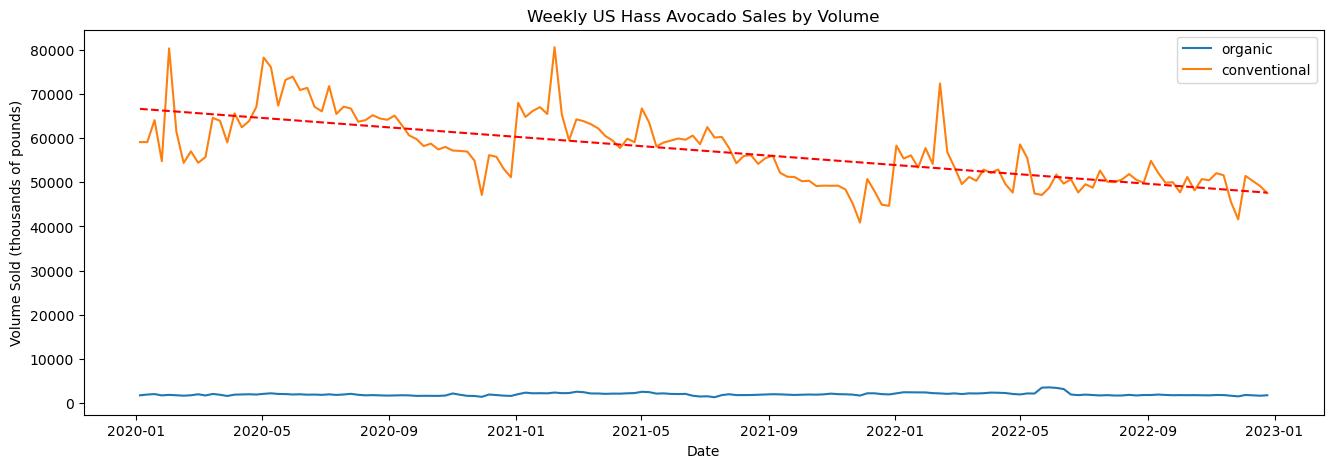

In [27]:
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Prettify the graph
plt.title("Weekly US Hass Avocado Sales by Volume")
plt.xlabel("Date")
plt.ylabel("Volume Sold (thousands of pounds)")
# Plot time series data
plt.plot(usa_organic)
plt.plot(usa_conventional)
plt.legend(['organic', 'conventional'])
# Generate trend line
x = mdates.date2num(usa_conventional.index)
y = usa_conventional.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# Plot trendline
plt.plot(x, p(x), "r--")
plt.show()

We can see here that organic avocados make up a very small portion of the overall US Hass avocado market, in the area of 1-2 million pounds per week. Conventional Hass avocados sell in much larger volume, ranging from 40 - 80 million pounds per week, though the trend line indicates that sales across the US have been dropping over the 3 year timeframe seen in this dataset. 

Organic Hass avocados can be examined by region, to see if they may be particularly popular in one region relative to others. If organic produce is less hardy when it comes to shipping and transport, such a relationship could make sense, as it would make avocados more readily available in regions where they are grown or grown nearby. 

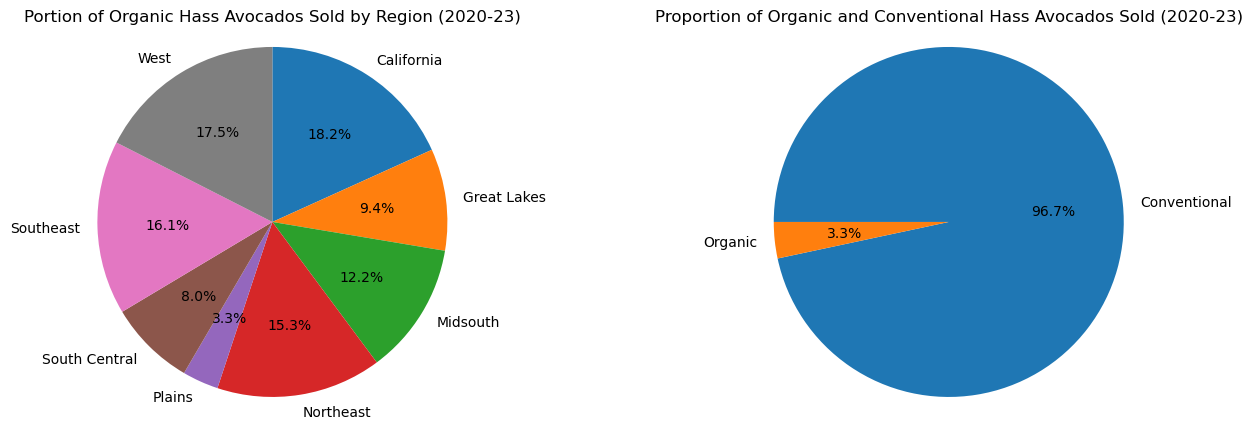

In [28]:
# Generate figure
plt.figure(figsize = [16,5])

# pie chart on left, organic avocado sales by region
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# Prettify the graph
plt.title("Portion of Organic Hass Avocados Sold by Region (2020-23)")
# Gather the data
organic_regional_sums = regional_df[regional_df['organic'] == True][['location', 'vol_sum_Tlbs']].groupby('location').sum()
# Plot the data
plt.pie(organic_regional_sums['vol_sum_Tlbs'], labels = organic_regional_sums.index, autopct='%1.1f%%', startangle = 90, counterclock = False)
plt.axis('square');

# pie chart on right, organic avocado sales as percentage of whole
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# Prettify the graph
plt.title("Proportion of Organic and Conventional Hass Avocados Sold (2020-23)")
# Gather the data
proportion = regional_df[['organic', 'vol_sum_Tlbs']].groupby('organic').sum()
proportion.index = ['Conventional', 'Organic']
# Plot the data
plt.pie(proportion['vol_sum_Tlbs'], labels = proportion.index, autopct='%1.1f%%', startangle = 180, counterclock = False)
plt.axis('square');

California, which grows Hass avocados, and the West in general are clearly the biggest purchasers, but the Northeast (which would be as far from California as you could get within the continental United States) still consumes a large portion of organic Hass avocados. The smaller regions, South Central & Plains, clearly show up as having the smallest portion of organic purchasing, but they are also smaller portions of the data overall. As it result, it seems that there isn't any particularly strong regional element to organic Hass avocado purchasing. 

We can see that organics make up just 3.3% of overall nationwide Hass avocado purchasing. As a result, this analysis will concentrate on conventional Hass avocados, and any unclear reference moving forward regarding organic vs conventional avocados should be understood as referring to conventional avocados. 

### Bulk vs Individual Avocado Purchasing

In [29]:
# Isolate dataframes to handle only the conventional avocados, omitting organics
usa_c_df = usa_df[usa_df['organic'] == False]
regional_c_df = regional_df[regional_df['organic'] == False]
market_c_df = market_df[market_df['organic'] == False]

In [30]:
# Isolate data for both individual and bulk purchasing, nationwide
individual_avo_cols = ['small_Tlbs', 'large_Tlbs', 'xlarge_Tlbs']
usa_c_packaging = usa_c_df.copy()
usa_c_packaging['individual'] = usa_c_packaging[individual_avo_cols].sum(axis=1)
usa_c_packaging['bulk'] = usa_c_packaging['bulk_Tlbs']
usa_c_packaging = usa_c_packaging[['bulk', 'individual']]
# Generate sums for the timeframe for both bulk and individual packaging
packaging_sums = usa_c_packaging.sum()

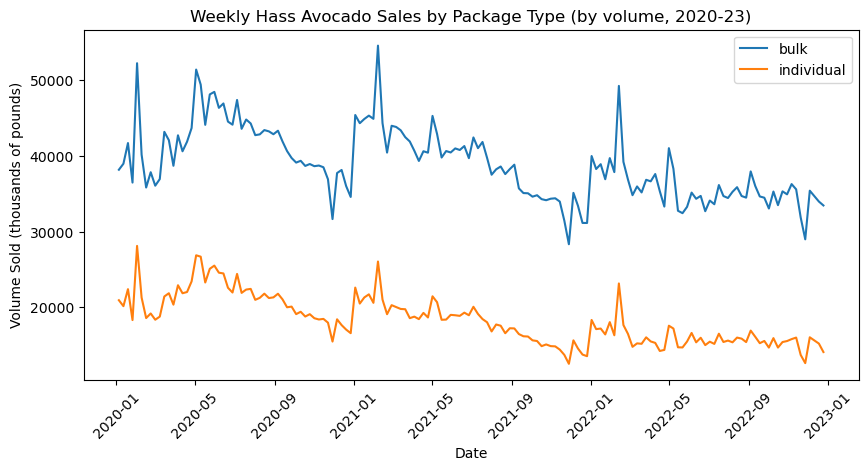

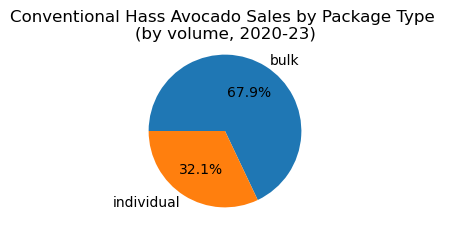

In [31]:
# Generate figure
plt.figure(figsize = [10, 10])

# line chart on left, volume sales by package type over timeframe
plt.subplot(2, 1, 1) # 2 rows, 1 col, subplot 1
# Prettify the graph
plt.title("Weekly Hass Avocado Sales by Package Type (by volume, 2020-23)")
plt.xlabel("Date")
plt.ylabel("Volume Sold (thousands of pounds)")
# Plot time series data
plt.plot(usa_c_packaging['bulk'])
plt.plot(usa_c_packaging['individual'])
plt.legend(['bulk', 'individual'])
plt.xticks(rotation=45)
plt.show();

# pie chart on right, nationwide bulk vs individual
plt.subplot(2, 1, 2) # 2 rows, 1 col, subplot 2
# Prettify the graph
plt.title("Conventional Hass Avocado Sales by Package Type \n(by volume, 2020-23)")
# Plot the data
plt.pie(packaging_sums, labels = packaging_sums.index, autopct='%1.1f%%', startangle = 180, counterclock = False)
plt.axis('square');

Bulk and individual Hass avocado sales appear to move very similarly over the 3 years in this dataset. Each line in the above graph has the same peaks and valleys, though the individual packaging type seems slightly smoother in its movement. This is likely owing to its lower overall sales, which are indicated by the above pie chart, showing about 1/3 of avocados by volume are sold individually, rather than in bulk. The proportion of individual sales relative to bulk sales also remains consistent throughout this period. 

We can also see seasonality in this data, with noticeable spikes in Hass avocado sales occurring around February and then subsiding until May, when sales spike again and then taper over the remainder of the year.

### Average Sale Prices Over Time

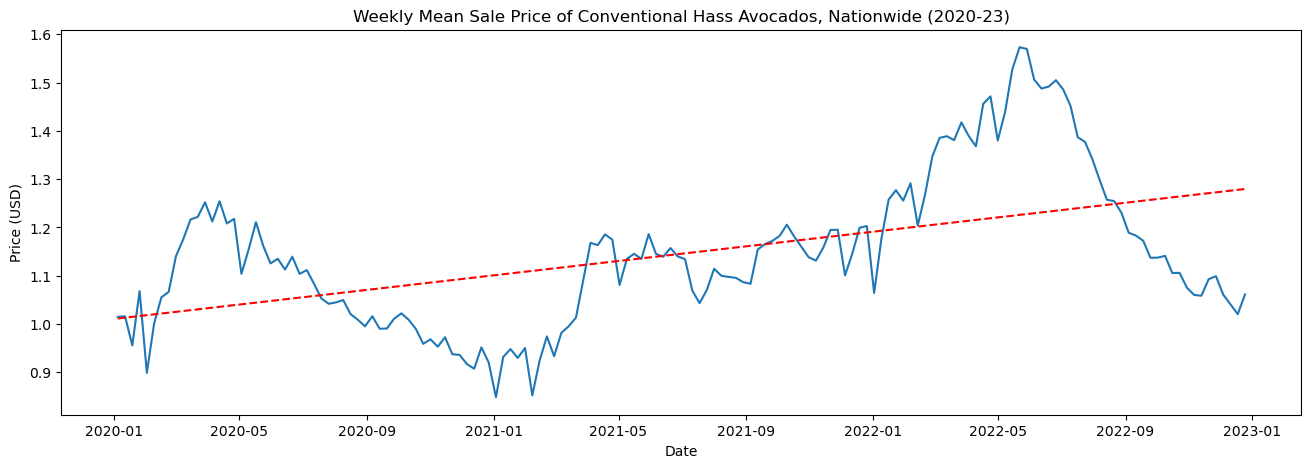

In [32]:
# Generate figure
plt.figure(figsize = [16,5])
# Prettify the graph
plt.title("Weekly Mean Sale Price of Conventional Hass Avocados, Nationwide (2020-23)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
# Plot time series data
plt.plot(usa_c_df['average_sale_price']);
# Generate trend line
x = mdates.date2num(usa_c_df.index)
y = usa_c_df['average_sale_price']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# Plot trendline
plt.plot(x, p(x), "r--")
plt.show()

Earlier graphs demonstrated that Hass avocado sales have gone down over the three year timeframe of this study, but this graph's trendline shows that the weekly mean sale price has increased in that same timeframe. After jumping up to nearly \\$1.60 in mid-2022, the price has dropped back down to around \\$1.00, where the price stood at the beginning of the dataset. 

Seasonality is less pronounced in this graph than it was in the sales data. We can see that the price spikes up around February of each year, just as sales did in the prior graphs. In 2020, the sales price climbed upwards and then tapered down over the rest of the year. In 2021, the price spiked upwards around the same time, but then it continued to climb upwards through the spring, staying relatively constant throughout the rest of the year. Then, in 2022, the price spiked up again in February, but this time it continued to climb until mid-summer, where it began to fall steeply. This seems to indicate some amount of seasonality (the price doesn't continue to climb in the back half of the year), though the precise nature of that seasonality is difficult to ascertain. 

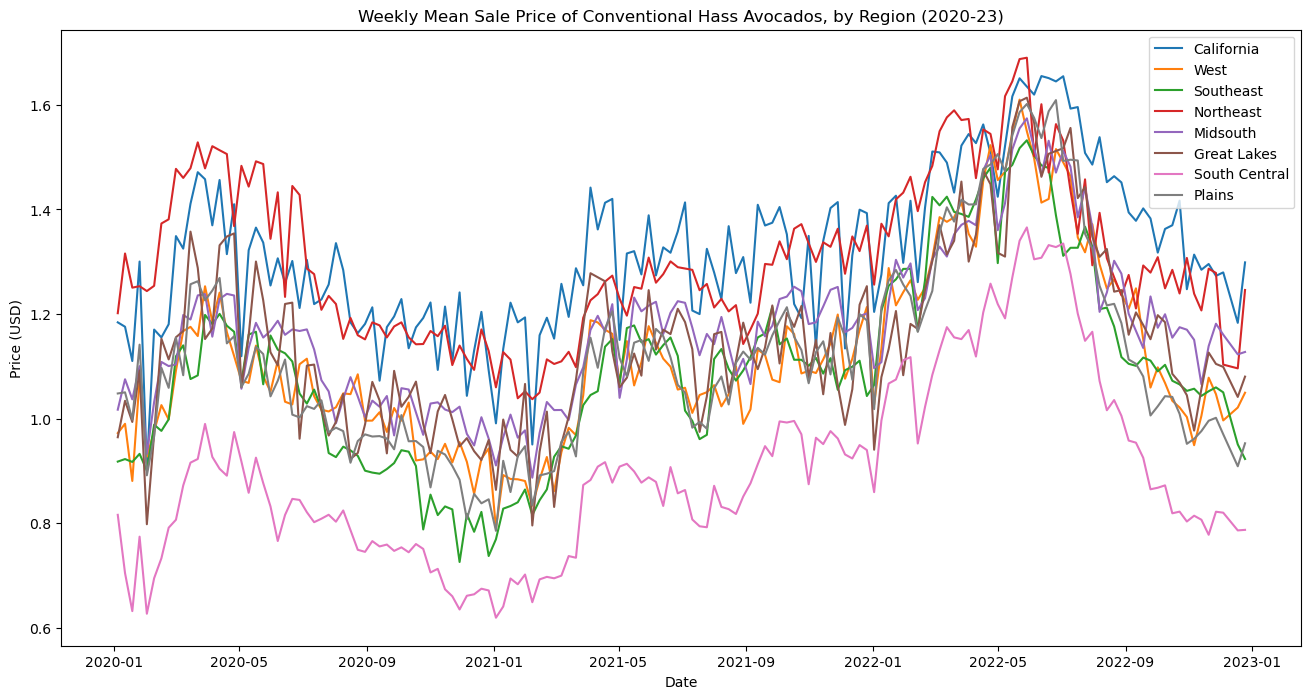

In [33]:
# Generate dataframe of prices by region, using end_of_week as index
prices_by_region = pd.DataFrame(index=usa_c_df.index)
prices_by_region["California"] = regional_c_df[regional_c_df['location'] == "California"]['average_sale_price'].values
prices_by_region["West"] = regional_c_df[regional_c_df['location'] == "West"]['average_sale_price'].values
prices_by_region["Southeast"] = regional_c_df[regional_c_df['location'] == "Southeast"]['average_sale_price'].values
prices_by_region["Northeast"] = regional_c_df[regional_c_df['location'] == "Northeast"]['average_sale_price'].values
prices_by_region["Midsouth"] = regional_c_df[regional_c_df['location'] == "Midsouth"]['average_sale_price'].values
prices_by_region["Great Lakes"] = regional_c_df[regional_c_df['location'] == "Great Lakes"]['average_sale_price'].values
prices_by_region["South Central"] = regional_c_df[regional_c_df['location'] == "South Central"]['average_sale_price'].values
prices_by_region["Plains"] = regional_c_df[regional_c_df['location'] == "Plains"]['average_sale_price'].values
prices_by_region
# Generate figure
plt.figure(figsize = [16,8])
# Prettify the graph
plt.title("Weekly Mean Sale Price of Conventional Hass Avocados, by Region (2020-23)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
# Plot time series data
plt.plot(prices_by_region['California']);
plt.plot(prices_by_region["West"]);
plt.plot(prices_by_region["Southeast"]);
plt.plot(prices_by_region["Northeast"]);
plt.plot(prices_by_region["Midsouth"]);
plt.plot(prices_by_region["Great Lakes"]);
plt.plot(prices_by_region["South Central"]);
plt.plot(prices_by_region["Plains"]);
plt.legend(['California', 'West', 'Southeast', 'Northeast', 'Midsouth', 'Great Lakes', 'South Central', 'Plains'])
plt.show()

Taking a more granular look at price data by examining the price by region over the same timeframe shows a series of patterns that are very similar to the national data. The South Central area (from central Texas to western Alabama) consistently has the lowest avocado prices, while California generally has the highest prices, sometimes being exceeded by the Northeast. [Colorado State University notes that 90% of United States avocado production comes from California](https://fsi.colostate.edu/avocados/), and Wikipedia notes that [Mexico is the largest producer of avocados](https://en.wikipedia.org/wiki/List_of_countries_by_avocado_production), generating nearly 30% of global production. It is understandable that the Northeast would pay high prices for avocados because of the necessity to pay for both their production *and* their shipping far from the source of their production. It is somewhat more surprising that California would have an even higher price, given that they are produced locally, though California is known for having a very high cost of living. 

<a id='PartD'></a>
## D: Time Series Analysis & Forecasting of Avocado Sales by Volume

The dataset allows us to perform a time series analysis of the volume of Hass avocado sales. The above graphs demonstrate that there is trend and seasonality within this dataset. This is consistent with our intuitive expectations, as we would expect a produce item to have some sort of seasonality element based on its growing season. We can see this in further detail by decomposing the series to examine its' trend, seasonality, and residuals.  

In [34]:
# Isolate the two series of data to be handled
usa_c_price = usa_c_df['average_sale_price'].copy()
usa_c_volume = usa_c_df['vol_sum_Tlbs'].copy()
# Set frequency of each series to be weekly
usa_c_price.index.freq = 'w'
usa_c_volume.index.freq = 'w'

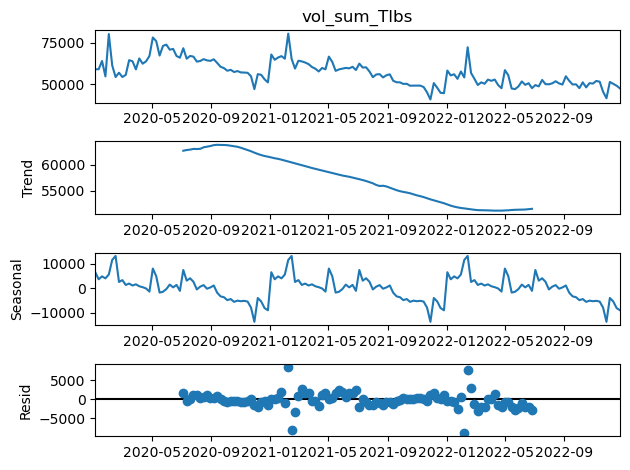

In [35]:
# Decompose the volume series to view the trend, the seasonal, and the residual elements
volume_decomposition = seasonal_decompose(usa_c_volume)
volume_trend = volume_decomposition.trend
volume_seasonal = volume_decomposition.seasonal
volume_residual = volume_decomposition.resid
volume_decomposition.plot();

The volume of Hass avocado sales (in thousands of pounds) shows a downward trend consistent with what was observed in the exploratory data analysis above. It is somewhat surprising that sales have decreased over the entire period of the study. Given that the United States' Hass avocado market is chiefly supplied by California, as noted above, it is very possible that these issues are largely restricted to issues occurring in California, potentially related to weather- and climate-based disasters such as wildfires and flooding. That is speculative on my part, but as someone who lives in the western United States, I'm aware that the impact of these disasters is becoming more and more significant annually. Determining such causal relationships is not possible with this dataset alone, but this is worth highlighting as something worthy of further research. 

The seasonality of the dataset is very evident in the above plot, maintaining very distinct patterns annually which seem to account for nearly a third (plus or minus 10,000 thousand pounds) of the overall volume of Hass avocados sold. Given that the dataset's frequency is weekly, and these issues occur annually, this intuitively implies a seasonality of every 52 periods. However, it is important to note that the seasonality could deviate slightly, for a couple of reasons. First of all, the calendar actually contains slightly more than 52 weeks (52 x 7 = 364 days), which means that a particular weekly measurement in one year doesn't consistently match up to the "same" weekly measurement in a subsequent year. Secondly, the "growing season" of a particular item of produce is subject to some variability due to environmental and weather factors which may shorten or length the season, such that a given week might be "in season" one year and "out of season" another year. Over a long enough timeframe, the impact of this might be minimized or may regress towards a seasonality of 52 weeks, but given the relatively short timeframe in this study, it is worth highlighting as a concern. 

The data will be split into a training set containing the data from 2020 and 2021 (66% of the data) and a test set containing the data from 2022 (33% of the data). This is a slightly larger test set size than would be ideal (a test set size of 20-30% of the training set is generally preferred), but it maintains a full year of the data in the test_set. Reducing the test set to something like 25% of the total dataset would incorporate the early-year peak data from 2022 into the rest of the training set, creating a bias where the test set would primarily consist of the late-year diminishing values, while the training set would be biased to include an extra peak of data from the early portion of 2022. Maintaining a test size of 33% avoids these issues of intentionally biasing either the train or test sets, being the most equitable solution to generate a meaningful train/test split without having access to more data (the Hass Avocado Board does not have reports from prior to 2020 publicly available on their website). 

The process of attempting to develop an effective time series forecast of the voluma of sales for 2022 will begin with an initial ARIMA model as a baseline, and then a SARIMA model to incorporate the seasonality of the data. Prior to generating an ARIMA/SARIMA model of the data, the trend should be removed to create stationarity of the data. The seasonality of the data will, however, be maintained in the data and attempted to be handled through the use of a SARIMA model that accounts for seasonality. In this way, the de-trended data will be forecasted by the model. The trend can then be reincorporated into that data, to demonstrate the forecast in an intuitive way, rather than the detrended fashion. 

If an optimally predictive model is not generated through ARIMA/SARIMA models, then the process will continue to attempting to generate a model with `prophet`, which uses algorithms other than Auto Regression/Moving Average. If a promising model is found with `prophet`, hyperparameter tuning will be used to optimize that model. It is worthwhile to note that `prophet` does not require the data to be de-trended or de-seasonalized, so this will use the detrended volume data and generate forecasts that include the trend, similar to the output forecasts of the ARIMA/SARIMA models. 

With the output forecast plots of each model being of the full dataset, without de-trending, the plots are able to be compared to each other equitably. In order to compare the performance of different models, the root mean squared error (RMSE) of each model's 2022 forecast will be determined. Models with a lower root mean squared error are more effective predictors. Through this process, a variety of models will be used iteratively to work towards an optimized "final" model, which will then have its mean absolute percentage error (MAPE) calculated to determine if the null hypothesis is rejected or not.

The advantage of using RMSE as an evaluation metric is that it can easily be calculated by using scikit-learn's `mean_squared_error()` function with the `squared=False` argument, and this allows for a very quick and easy comparison of each model. The disadvantage of using RMSE is that it can be used to determine one model's effectiveness relative to another, but there is no way to distinguish an objectively "good" RMSE from a "bad" RMSE because it reflects the units being predicted. In this case, where we are predicting hundreds of thousands of pounds of avocados being sold, an RMSE in the thousands or even tens of thousands is likely and may even be part of an effective forecast. In another context, an RMSE in the thousands might be indicative of a terrible model. Without any standardization, a conclusion saying "this model has an RMSE of x" cannot be effectively evaluated on its own. 

The primary advantage of MAPE as an evaluation metric is that it is standardized, as it represents a percentage. In this way, a conclusion stating that "this model has a percentage error of x" is much more easily understood without needing as much context. MAPE does have a disadvantage, however, in that there is no objective benchmark for what distinguishes a "great", "good", or "fine" model, being to some extent related to the situation at issue. For example, a 2% error would represent an exceptional forecasting model for forecasting avocado sales, but that might not be the case for forecasting failure of a component used in aerospace applications. As a result, there is a somewhat arbitrary element in this study's declaration of 20% or better (less) MAPE as a threshold for success or failure of a forecasting model, which must be acknowledged. 

In [36]:
# Detrend the data by taking the difference of each datapoint, and then dropping the initial value, which is NaN
usa_c_volume_detrend = usa_c_volume.diff().dropna()
# Split time series into a training set and a test set, 2020/2021 as the training set, 2022 as the test set
detrend_train, detrend_test = train_test_split(usa_c_volume_detrend, test_size=52, shuffle=False, random_state=369)
# Make sure split occurs at 2021/2022 breakpoint
detrend_train

week_ending
2020-01-12       12.06344
2020-01-19     4970.89365
2020-01-26    -9296.98044
2020-02-02    25552.17275
2020-02-09   -18891.73663
                 ...     
2021-11-28    -4288.02938
2021-12-05     9880.34308
2021-12-12    -2783.79079
2021-12-19    -3066.13345
2021-12-26     -217.20022
Freq: W-SUN, Name: vol_sum_Tlbs, Length: 103, dtype: float64

In [37]:
# Split the original data series (still including the trend) the same way - this will be used for plotting
volume_full_train, volume_full_test = train_test_split(usa_c_volume, test_size=52, shuffle=False, random_state=369)
# Make sure split occurs at 2021/2022 breakpoint
volume_full_train

week_ending
2020-01-05    59095.69971
2020-01-12    59107.76315
2020-01-19    64078.65680
2020-01-26    54781.67636
2020-02-02    80333.84911
                 ...     
2021-11-28    40865.71139
2021-12-05    50746.05447
2021-12-12    47962.26368
2021-12-19    44896.13023
2021-12-26    44678.93001
Freq: W-SUN, Name: vol_sum_Tlbs, Length: 104, dtype: float64

In [38]:
# Establish dataframe of volume sold for last week of 2021 (used for reconstructing volume of 2022 forecast)
last_row_2021 = pd.DataFrame({'vol_sum_Tlbs': [usa_c_volume[103]], 'lower_bound' : [usa_c_volume[103]], 'upper_bound' : [usa_c_volume[103]], 'date' : ["2021-12-26"]})
# Convert given date string to datetime and then set as index
last_row_2021['date'] = pd.to_datetime(last_row_2021['date'])
last_row_2021.set_index('date', inplace=True)
last_row_2021

,vol_sum_Tlbs,lower_bound,upper_bound
date,,,
2021-12-26,44678.93001,44678.93001,44678.93001


Analysis of the dataset will start with an ARIMA model, using `auto_arima()` to determine an appropriate value for both `p` and `q` for the time series. Once a model is chosen, a forecast will then be generated for the test set, plotting the forecasted data for 2022, the confidence interval of those predictions, and the observed data for 2022. This forecast will also provide a mean squared error for the forecast. Given that there is clearly a significant seasonality element to the data, this forecast that omits seasonality exists only as a baseline comparison for subsequent forecasting. 

[Brendan Artley's tutorial at Towards Data Science on Time Series Analysis](https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6) using `pmdarima`and the `auto_arima()` function was extremely helpful here, especially with the generation of the `forecast()` function. 

In [39]:
# Generate a standard ARIMA for volume
volume_arima_model = pm.auto_arima(detrend_train, 
                      start_p=0, start_q=0,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

The root mean squared error of the model graphed below is 7395.807.


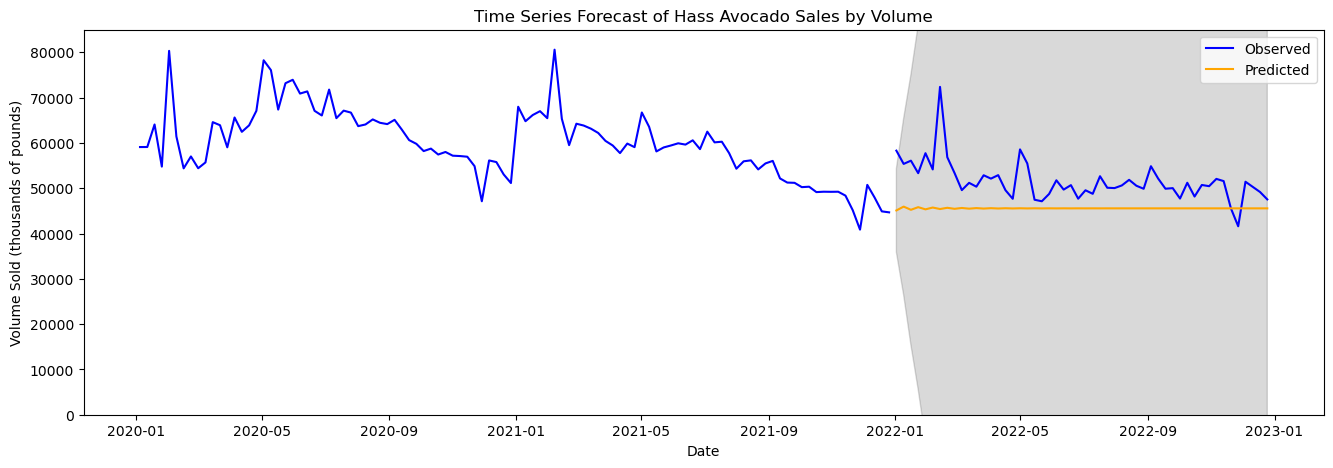

In [40]:
def forecast(provided_arima_model, periods, detrended_train_series, full_train_series, full_test_series):
    # Perform the forecasting
    fitted, conf_int = provided_arima_model.predict(n_periods = periods, return_conf_int=True)
    forecast_index = pd.date_range(detrended_train_series.index[-1] + pd.DateOffset(weeks=1), periods = periods, freq='W-SUN')
    # Generate series for plotting
    predicted_values = pd.Series(fitted, index=forecast_index)
    lower_bound = pd.Series(conf_int[:, 0], index= forecast_index)
    upper_bound = pd.Series(conf_int[:, 1], index= forecast_index)
    # Transform the predicted values to have the trend included
    # Generate a dataframe for each of the three predictions (forecasted value, lower bound, upper bound)
    predicted_df, lower_df, upper_df = pd.DataFrame(predicted_values), pd.DataFrame(lower_bound), pd.DataFrame(upper_bound)
    # Rename the values column of each dataframe as appropriate
    predicted_df.rename(columns={0 : 'vol_sum_Tlbs'}, inplace=True)
    lower_df.rename(columns={0 : 'lower_bound'}, inplace=True)
    upper_df.rename(columns={0 : 'upper_bound'}, inplace=True)
    # Join all three one-column dataframes to a single dataframe
    predicted_df = predicted_df.join(lower_df, how='inner').join(upper_df, how='inner')
    # Concatenate the previous row (26 Dec 2021) data to the forecasted data
    forecast_2022 = pd.concat([last_row_2021, predicted_df])
    # Add trend back to the data by inversing earlier diff() with cumsum()
    forecast_2022 = forecast_2022.cumsum()
    # Omit the previous row portion of the dataframe to only have 2023 data
    forecast_2022 = forecast_2022.loc['2022-01-02' : '2022-12-25'].copy()
    # Report the mean squared error
    forecasted_mse = round(mean_squared_error(full_test_series, forecast_2022['vol_sum_Tlbs'], squared=False),3)
    print(f"The root mean squared error of the model graphed below is {forecasted_mse}.")
    # Plot the forecast
    plt.figure(figsize=[16, 5])
    plt.plot(full_train_series, color="blue", label="Observed")
    plt.plot(full_test_series, color="blue")
    plt.plot(forecast_2022['vol_sum_Tlbs'], color="orange", label="Predicted")
    plt.fill_between(forecast_2022['lower_bound'].index, forecast_2022['lower_bound'], forecast_2022['upper_bound'], color='k', alpha= 0.15)
    plt.title(f"Time Series Forecast of Hass Avocado Sales by Volume")
    plt.xlabel("Date")
    plt.ylabel("Volume Sold (thousands of pounds)")
    plt.legend()
    # Zoom in on y axis to see points a little more clearly
    plt.ylim(0, 85000);
    plt.show()
    
forecast(volume_arima_model, 52, detrend_train, volume_full_train, volume_full_test)

In [41]:
volume_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  103
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1017.414
Date:                Wed, 08 Mar 2023   AIC                           2042.828
Time:                        18:56:42   BIC                           2053.367
Sample:                             0   HQIC                          2047.097
                                - 103                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8283      0.116     -7.125      0.000      -1.056      -0.600
ma.L1          0.3341      0.122      2.740      0.006       0.095       0.573
ma.L2         -0.5352      0.083     -6.415      0.000      -0.699      -0.372
sigma2      2.214e+07   3.92e-09   5.64e+15      0.000    2.21e+07    2.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               218.23
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.95e+31. Standard errors may be unstable.
"""

The model summary indicates a (1, 0, 2) model with an AIC of 2042. Looking at the plot, the non-seasonal ARIMA model clearly doesn't do a great job of predicting the volume of Hass avocados sold over 2022, largely sticking to a baseline value that the model determines and refusing to deviate from that value by any significant amount. This poor prediction, once the trend is added back in, has a root mean squared error of 7395.807. A SARIMA model could incorporate the seasonality that would reflect the movement in the observed data, but this requires a decision to be made regarding what that seasonal period should be. 

In order to isolate a particular value for this seasonal period, we can plot the ACF and PACF for the full series, picking the value that shows the largest interval that is statistically significant (appearing outside of the shaded region that indicates statistical insignificance). Lags of up to 55 weeks will be plotted, to reflect that the seasonal variance is intuitively 52 weeks but may be a little more or less than this expected value, as explained above. 

C:\Users\hasek\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


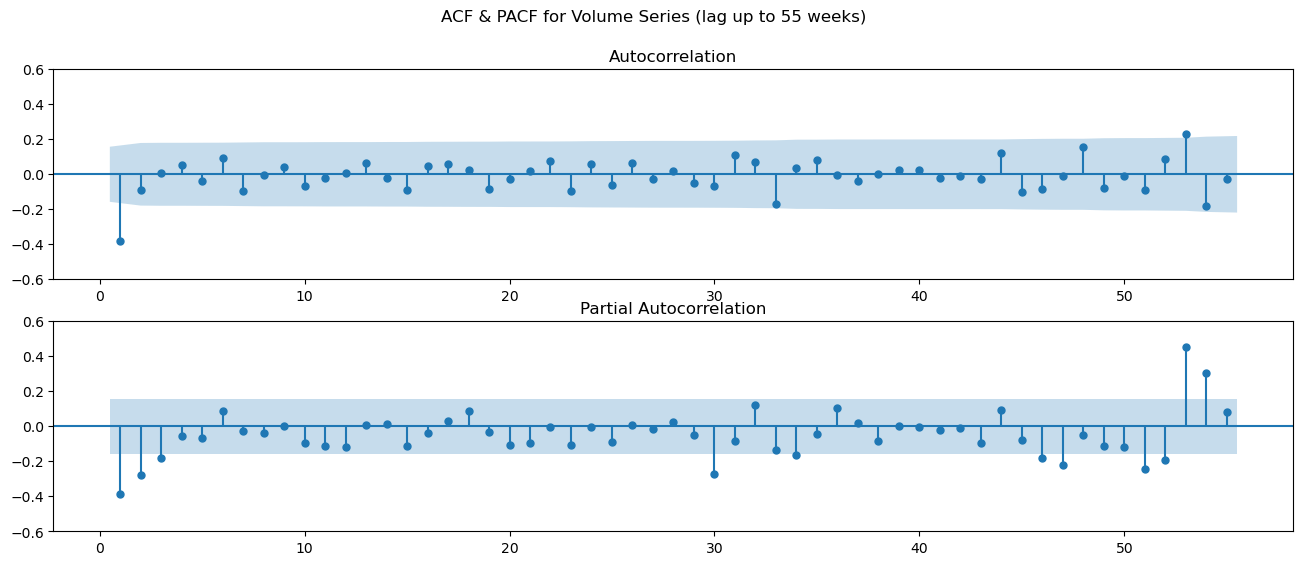

In [42]:
# Plot Autocorrelation and Partial Autocorrelation in one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[16,6], sharey=True)
plt.suptitle("ACF & PACF for Volume Series (lag up to 55 weeks)")
# Plot ACF to 8 lags (only 7 days in a week), ignore zero (zero always = 1)
plot_acf(usa_c_volume_detrend, lags=55, zero=False, ax=ax1);
# Plot PACF to  lags (only 7 days in a week), ignore zero (zero always = 1)
plot_pacf(usa_c_volume_detrend, lags=55, zero=False, ax=ax2);
# Zoom in on y axis to see points a little more clearly
plt.ylim(-0.6, 0.6);

The above plots show that the ACF and PACF both become statistically significant (outside of the blue shaded area) again around the 1-year mark in terms of lag. Interestingly, the PACF is most significant at the 53-week mark, rather than the intuitive 52. The ACF becomes just slightly significant at 53, without any significance at nearby values. As a result, the SARIMA model will be generated to reflect a 53-week seasonality. 

*Note: While the 53-week seasonality is somewhat unexpected, additional SARIMA models using 50, 51, 52, 54, and 55 week models were performed, and each of these models produced a dramatically worse root mean squared error than the 53-week model. These additional models are not provided here, because the generation of multiple SARIMA models within this notebook seemed to cause issues on my hardware and would frequently lead to memory problems and significant PC crashes over the course of two days where each model was iterated upon independently.*

The root mean squared error of the model graphed below is 14054.253.


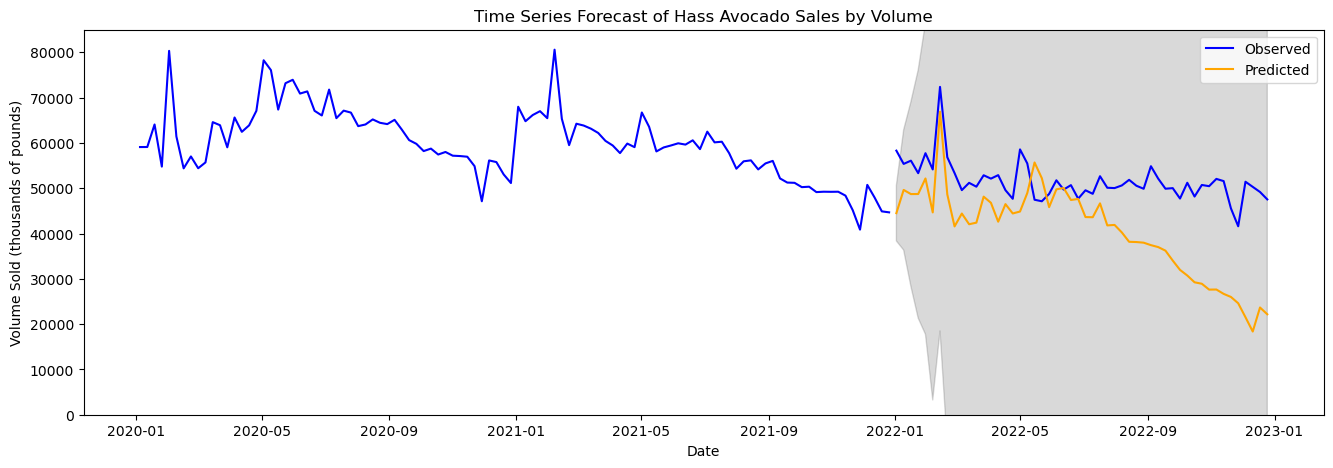

In [43]:
# Generate a SARIMA model for volume
volume_sarima_model = pm.auto_arima(detrend_train, 
                      start_p=0, start_q=0,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=53, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=True, 
                      D=1,
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)
forecast(volume_sarima_model, 52, detrend_train, volume_full_train, volume_full_test)

In [44]:
# Generate model summary
volume_sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  103
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 53)   Log Likelihood                -473.138
Date:                             Wed, 08 Mar 2023   AIC                            954.276
Time:                                     19:07:38   BIC                            961.924
Sample:                                          0   HQIC                           957.188
                                             - 103                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -378.4866    217.430     -1.741      0.082    -804.641      47.668
ma.L1         -0.6298      0.103     -6.093      0.000      -0.832      -0.427
ar.S.L53      -0.7181      0.045    -16.059      0.000      -0.806      -0.630
sigma2      9.135e+06      0.012   7.71e+08      0.000    9.13e+06    9.13e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.42
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             0.83
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.93e+24. Standard errors may be unstable.
"""

The model summary indicates a (0, 0, 1) model with an AIC of 954 and a seasonal lag of 53. The root mean square error of this model is significantly worse than the ARIMA model, with an RMSE of 14054.253 compared to the prior model's RMSE of 7396. This is odd, because the worse RMSE indicates a worse model, but the lower AIC indicates a better model. We can see that this model more clearly follows the path of the observed data, but it ends up being a very low estimate of the volume of avocados sold, so it's predictions are low across the board. 
 
What is both interesting and concerning is that throughout the year, the forecasted data begins to become uncoupled from the observed data. There is a general pattern of peaks immediately followed by valleys throughout most of the observed data. The forecasted data tracks with that pattern near the largest peaks and valleys in early 2022, which is likely what makes this model the "most accurate" in terms of its seasonality. The peaks and valleys of the predicted values are initially fairly consistent with the peaks and valleys in the observed data, though the predicted values are too low, as noted. However, around April of 2022, the model's projected peaks and valleys end up being off by 1, with peaks and valleys both occurring one position to the right (1 week later) than they appear in the observed dataset. As the predicted values start to dwindle towards a baseline in the fall, the models movement actually ends up being off by 2 weeks from the observed data. As a result, this model ends up being most accurate at the most important time of year, by sales volume, but its accuracy degrades significantly throughout the rest of the year, getting worse and worse as the forecast is made further and further out. 

With both ARIMA and SARIMA models failing to provide a very effective forecast, I began looking for alternatives for other time series analysis and forecasting tools. In the course of my searching, I found [Prophet](https://facebook.github.io/prophet/), an open source time series analysis package available in both Python and R, authored by Facebook's Core Data Science team. Prophet is well-documented and designed to work in a manner very similar to the SciKit-Learn packages we used earlier in the MSDA program. Prophet ends up being a really effective algorithm for generating a univariate or multivariate time series forecast, and I enjoyed learning to use it in this context. 

Prophet does require that the data be set up with the variable of interest labelled as 'y' and the date as a column (*not* an index, as I've been using it to this point in this analysis) named 'ds'. 

In [45]:
# Redo the train/test splits, with volume as 'y' and date as column 'ds' rather than index, 2020/21 for train, 2022 for test
temp_volume_df = pd.DataFrame(usa_c_volume.copy())
temp_volume_df['ds'] = temp_volume_df.index
temp_volume_df.rename(columns={'vol_sum_Tlbs' : 'y'}, inplace=True)
# Replace index so that it is an integer rather than the datetime that it was previously
temp_volume_df.reset_index(drop=True, inplace=True)
volume_train, volume_test = train_test_split(temp_volume_df, test_size=52, shuffle=False, random_state=369)

In [46]:
# Instantiate prophet, providing the argument that yearly seasonality exists, because we've seen this in the data previously
m = Prophet(yearly_seasonality=True)
# Fit it to the training data 
m.fit(volume_train)
# Make a dataframe for the predictions we want to make (2022), starting with the date
future = m.make_future_dataframe(periods=52, freq='W-SUN')
future.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
151,2022-11-27
152,2022-12-04
153,2022-12-11
154,2022-12-18
155,2022-12-25


When generating the `future` dataframe, we notice that the index extends out to 155. This is because in feeding the model historical data (the training data), Prophet actually incorporates that historical data into the dataframe as well. As a result, we end up with a dataframe that is 156 entries long, just like the original `usa_c_volume` dataframe was, consisting of 3 years at 52 weeks each. When we use the `predict()` method of the fitted model, Prophet will generate a predicted value for that index (`yhat`), as well as a lower confidence interval (`yhat_lower`) and upper confidence interval (`yhat_upper`). 

In [47]:
# Fill the dataframe with the predictions for that time series
forecast = m.predict(future)
# ds = date, yhat = predicted value, yhat_lower = lower confidence interval, yhat_upper = upper confidence interval
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2022-11-27,33490.355392,28250.729579,38385.448989
152,2022-12-04,33279.405470,28154.870165,38260.070494
153,2022-12-11,33575.854466,28079.617781,38404.503067
154,2022-12-18,34345.965738,29335.869445,39239.947772
155,2022-12-25,35558.951650,30099.238206,40742.898650


Prophet does have its own pre-set plot for its forecasts. This maps its historical estimates as well as the true historical values, in addition to maintaining its forecasted estimates for the desired period, which in this case is the entirety of 2022. It is also worth highlighting that Prophet decomposes the time series into its trend and seasonal components,  storing a wide variety of data in its forecast dataframe. This data will not be explored in detail here, but it is worth highlighting its existence. 

In [48]:
forecast.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
153,2022-12-11,41359.009571,28079.617781,38404.503067,39622.226913,43022.955931,-7783.155105,-7783.155105,-7783.155105,-7783.155105,-7783.155105,-7783.155105,0.0,0.0,0.0,33575.854466
154,2022-12-18,41149.856930,29335.869445,39239.947772,39346.704132,42864.341892,-6803.891193,-6803.891193,-6803.891193,-6803.891193,-6803.891193,-6803.891193,0.0,0.0,0.0,34345.965738
155,2022-12-25,40940.704290,30099.238206,40742.898650,39072.119196,42684.295205,-5381.752640,-5381.752640,-5381.752640,-5381.752640,-5381.752640,-5381.752640,0.0,0.0,0.0,35558.951650


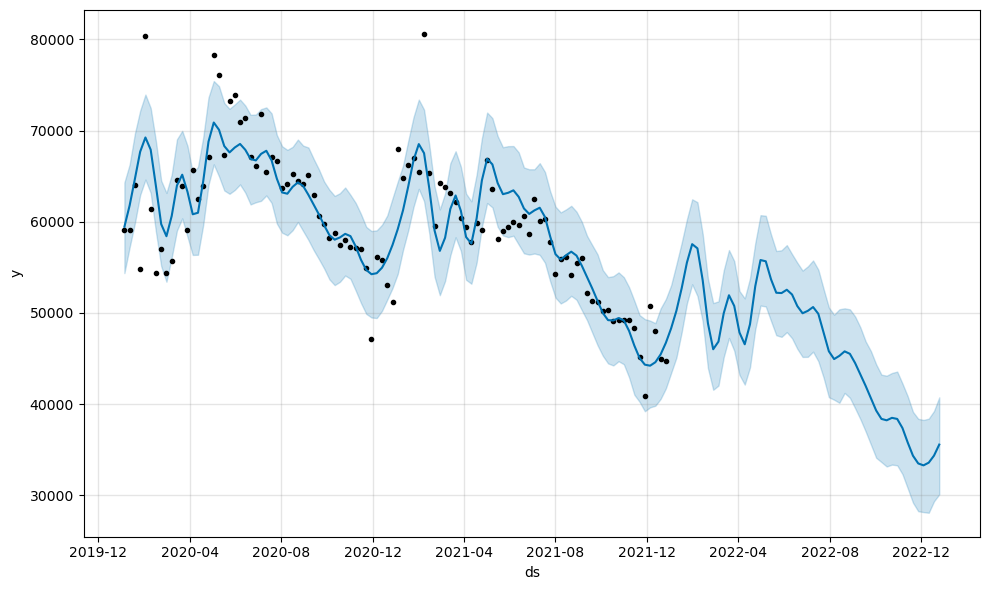

In [49]:
# Generate Prophet's plot
fig1 = m.plot(forecast)

While Prophet's plotting looks good, it doesn't appear to have a method by which we can include the test series that we want to check these estimates against. As a result, another plot will be necessary. 

The root mean squared error of the model graphed below is 8284.92172865035


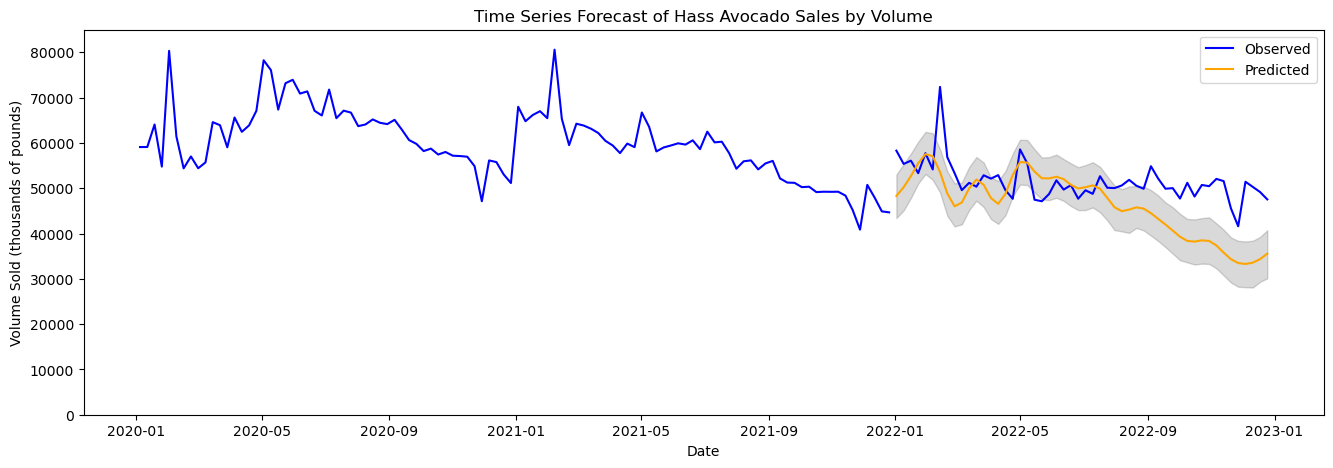

In [50]:
# Isolate the forecasted values into a series so we can easily plot it by itself
temp_forecast = pd.DataFrame(forecast['yhat'][104:])
temp_forecast.index = volume_full_test.index
temp_forecast
print(f"The root mean squared error of the model graphed below is {mean_squared_error(volume_test['y'], temp_forecast, squared=False)}")
# Plot the forecast
plt.figure(figsize=[16, 5])
plt.plot(volume_full_train, color="blue", label="Observed")
plt.plot(volume_full_test, color="blue")
plt.plot(temp_forecast, color="orange", label="Predicted")
plt.fill_between(forecast['ds'][104:], forecast['yhat_lower'][104:], forecast['yhat_upper'][104:], color='k', alpha= 0.15)
plt.title(f"Time Series Forecast of Hass Avocado Sales by Volume")
plt.xlabel("Date")
plt.ylabel("Volume Sold (thousands of pounds)")
plt.legend()
# Zoom in on y axis to see points a little more clearly
plt.ylim(0, 85000);
plt.show()

This model has a root mean squared error of 8284.922. This is a bit worse than the ARIMA model (7396) but much better than the SARIMA model's RMSE of 14054. This model does, however, show some promise. It has a much smoother movement (less sharp peaks and valleys) over the course of its estimates. It is *much* more confident about its estimates than the prior two models were. It also manages to stay in the same ballpark as the observed data through the first 6 months of 2022, before it starts dwindling further away from the observed data in the back half of 2022, where it is most inaccurate. This particular deviation is likely a result of the fact that the downward trend over the course of the year was much stronger in 2020 and 2021, on which the model was trained, than it actually ended up being in 2022. 

With this model showing some promise, hyperparameter tuning was performed. The code for this tuning is provided in the following cell, though it is not executed here. This is because the execution of this cell took nearly 3 hours, during which I had to stay on hand to make sure the computer did not go to sleep. 

The hyperparameter tuning performed in that step returned a most effective set of parameters (selected by the lowest root mean standard error) of a `changepoint_prior_scale` of 0.5, a `seasonality_prior_scale` of 0.10, and a `changepoint_range` of 0.8. Explanations of these parameters will reference the [Prophet documentation for hyperparameter tuning](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning). 

- `changepoint_prior_scale` is defined by Prophet as the flexibility of the trend, primarily how the trend changes at the trend changepoints. The Prophet documentation states that this is the most important parameter, likely to underfit if the value is too small and overfitting if the value is too large. Prophet also notes that this functions similarly to a Lasso penalty. The default for this value is 0.05, and tuning found an optimal value of 0.5. 
- `seasonality_prior_scale`is defined by Prophet as the flexibility of the seasonality, similar to the changepoint prior scale. Again, too small of a value is likely to lead to underfitting, while too large a value is likely to cause overfitting. Prophet also notes that this functions similarly to a L2 penalty in Ridge regression. The default is 10.0, and tuning found an optimal value of 1.0.
- `changepoint_range` is defined by Prophet as the proportion of the history in which the trend is allowed to change. The default is 0.8, which ended up being the optimal value found in my hyperparameter tuning. This prevents the model from fitting trend changes into the back 20% of the time series, to avoid overfitting in circumstances where running up against the end of the time series might not leave adequate room to fit the trend effectively. Given that the above model struggled in the back portion of the forecast the most, I tried modifying this using values of 0.9 and 0.95, but 0.8 actually gave the best fit for the model. 

With the hyperparameters selected for an optimized model, they were then put into place for a final forecasting model. 

In [51]:
# Generate a new instance of Prophet with the chosen hyperparameters
f_model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.5, seasonality_prior_scale=1.0)
# Fit it to the training data
f_model.fit(volume_train)
# Make a dataframe for the predictions we want to make (2022), starting with the date
final_future = f_model.make_future_dataframe(periods=52, freq='W-SUN')
# Fill the dataframe with the predictions for that time series
final_forecast = f_model.predict(final_future)
# ds = date, yhat = predicted value, yhat_lower = lower confidence interval, yhat_upper = upper confidence interval
final_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
151,2022-11-27,41809.916707,31445.088655,53295.539326
152,2022-12-04,41485.554936,30142.951667,52985.134185
153,2022-12-11,41512.671778,30104.852374,53670.700812
154,2022-12-18,42442.172298,30729.534011,54263.657144
155,2022-12-25,44692.277185,32679.263315,56832.091793


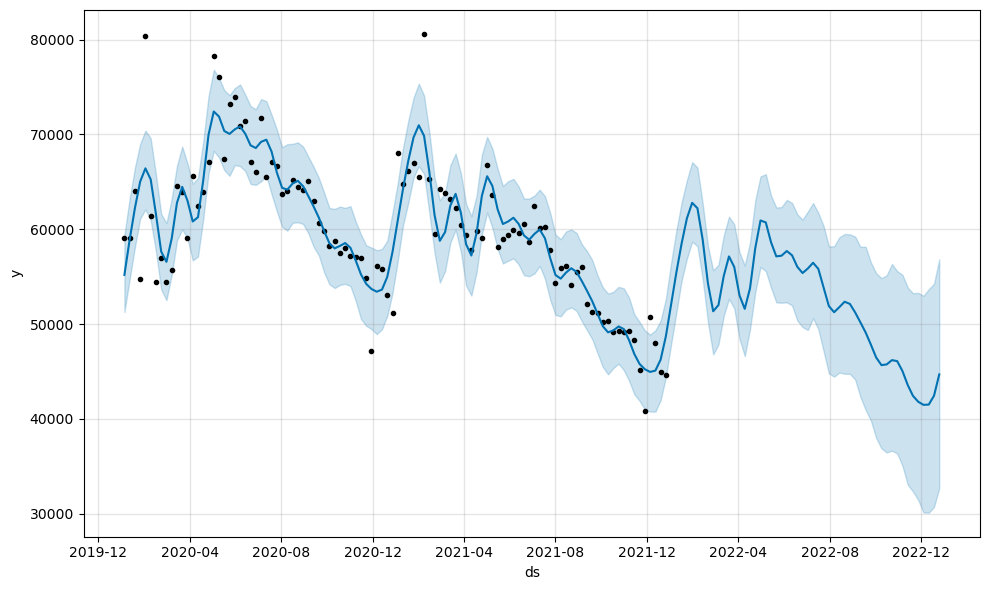

In [52]:
# Generate Prophet's plot
fig1 = f_model.plot(final_forecast)

The root mean squared error of the model graphed below is 5701.338609407661


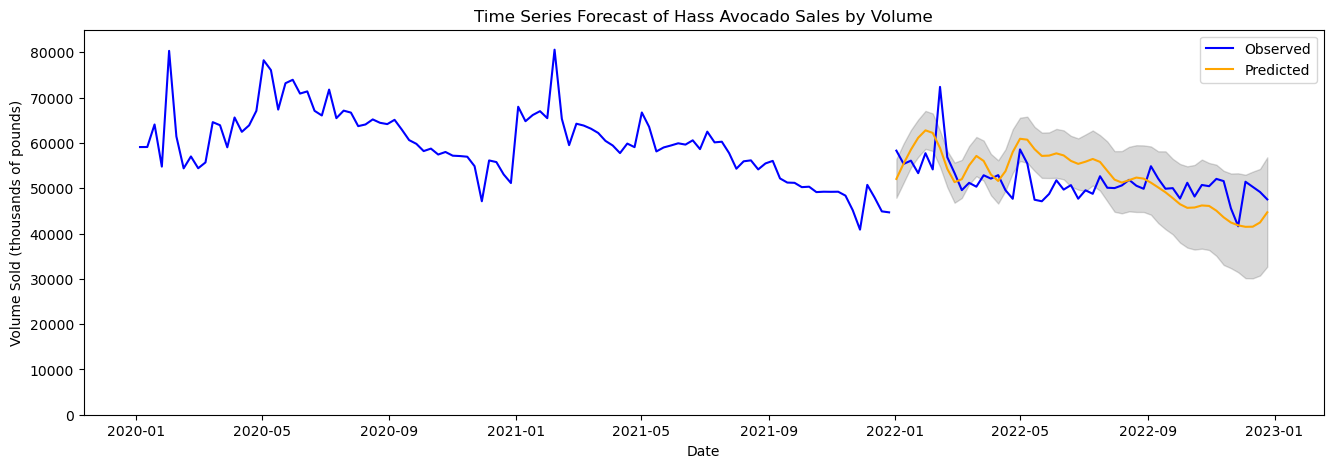

In [53]:
# Isolate the forecasted values into a series so we can easily plot it by itself
temp_forecast = pd.DataFrame(final_forecast['yhat'][104:])
temp_forecast.index = volume_full_test.index
temp_forecast
print(f"The root mean squared error of the model graphed below is {mean_squared_error(volume_test['y'], temp_forecast, squared=False)}")
# Plot the forecast
plt.figure(figsize=[16, 5])
plt.plot(volume_full_train, color="blue", label="Observed")
plt.plot(volume_full_test, color="blue")
plt.plot(temp_forecast, color="orange", label="Predicted")
plt.fill_between(final_forecast['ds'][104:], final_forecast['yhat_lower'][104:], final_forecast['yhat_upper'][104:], color='k', alpha= 0.15)
plt.title(f"Time Series Forecast of Hass Avocado Sales by Volume")
plt.xlabel("Date")
plt.ylabel("Volume Sold (thousands of pounds)")
plt.legend()
# Zoom in on y axis to see points a little more clearly
plt.ylim(0, 85000);
plt.show()

This final model finishes with a root mean squared error of 5701.339. That is significant improvement over the initial Prophet model's RMSE of 8285, and it is also much improved over the initial ARIMA model's RMSE of 7396. While the absolute value of this root mean squared error seems quite high, given that we're dealing with tens of thousands of pounds of avocados weekly, and this forecast is performed over an entire year, this isn't as bad as it might initially seem. 

RMSE as an evaluation metric is a good point of comparison amongst models on the same data, but it is difficult to use RMSE to declare if a model is "good" or "effective", because it is not normalized. Our final RMSE of 5701 makes our model seem like a good one in relation to the other models attempted here, but an RMSE of 5701 might be an awful error for another problem. The Mean Absolute Percentage Error (MAPE) can be a more easily interpreted evaluation metric because it is standardized, representing the the percentage error between the actual and forecasted values. 

In [54]:
mape_2022 = round(mean_absolute_percentage_error(volume_test['y'], temp_forecast), 3)
print(f"The mean absolute percentage error of this 2022 forecast is {mape_2022}.")

The mean absolute percentage error of this 2022 forecast is 0.092.


What constitutes a "good" or "accurate" MAPE score largely depends upon the nature of the problem, as there is not an objective distinction of what distinguishes a "good" MAPE score from a "fine" one or even a "bad" one. However, there seems to be a popular rule of thumb that a MAPE of under 10% is a highly accurate forecast, one under 20% is considered to be a good forecast, and MAPE of 20% - 50% may be okay, [as explained by Stephen Allwright in this article](https://stephenallwright.com/good-mape-score/). Additional discussion occurs about these standards [in this post at Stack Exchange's Cross Validated](https://stats.stackexchange.com/questions/473716/is-there-any-standard-criteria-of-good-forecast-measured-by-smape-and-mase), and as best as I can tell from my own research, it seems that this rule of thumb comes from [a 1982 text, *Industrial and Business Forecasting Methods* by CD Lewis](https://onlinelibrary.wiley.com/doi/10.1002/for.3980020210). 

It was based upon this research that the proposal for this analysis offered a threshold of 20% MAPE or better (less) as the criteria for successfully generating an effective forecast model. As it turned out, this model finished at 9.2%% MAPE, which narrowly meets the threshold for a "highly accurate" model and easily clears the bar set for this analysis to deem the model as an effective one. Given that this model was trained on just two years worth of data, I think building a more effective model that reaches that level is definitely possible with additional historical data. It is also worth noting that the Hass Avocado Board has supplier data listed in their dashboard that is not available for public download, and access to this data would likely improve the model as well.

With this model generated and trained, there is one other interesting thing that can be done with it. With the model fitted on the training data (2020 & 2021), we can now extend the forecasting of the model from 2022 forward into 2023. As I complete this project in early March of 2023, downloadable data for 2023 is unavailable from the Hass Avocado Board website. However, I can gather volume data from [their dashboards](https://hassavocadoboard.com/volume-data-projections/) to use as a rough point of comparison against the SARIMA model's 2023 forecast.

In [55]:
# This is the data pulled at the start of March from the Hass Avocado Board website's volume visualizations
pulled_indices = ["2023-01-01", "2023-01-08", "2023-01-15", "2023-01-22", "2023-01-29", "2023-02-05", "2023-02-12", "2023-02-19", "2023-02-26",]
# IMPORTANT NOTE: CHECKING DATA FOR PRIOR WEEKS TO MAKE SURE THAT THIS DATA WAS INDICATIVE OF WHAT I THOUGHT IT WAS...
# THE DATA FROM THE VISUALIZATIONS IS ABOUT 10% HIGHER THAN WHAT WOULD BE EXPECTED FROM THE VALUES FROM THE DATASET
pulled_volumes = [55735.887, 52638.823, 50679.360, 57517.543, 71067.972, 68706.272, 61752.009, 43490.937, 54891.741]
pulled_2023_volume = pd.Series(pulled_volumes, index=pd.to_datetime(pulled_indices), name="vol_sum_Tlbs")
pulled_2023_volume.index.freq = 'w'
# Adjust the pulled data (reflects organic & conventional) to reflect only conventional (remove 3.3% of it)
pulled_2023_volume = pulled_2023_volume * 0.967
pulled_2023_volume

2023-01-01    53896.602729
2023-01-08    50901.741841
2023-01-15    49006.941120
2023-01-22    55619.464081
2023-01-29    68722.728924
2023-02-05    66438.965024
2023-02-12    59714.192703
2023-02-19    42055.736079
2023-02-26    53080.313547
Freq: W-SUN, Name: vol_sum_Tlbs, dtype: float64

In pulling this data from the Hass Avocado Board dashboards, I did go backwards to compare the dashboard's data in late 2022 against the data in this dataset. The volume data from the published dashboards is about 10% higher than the data contained in the downloadable dataset. I cannot explain this discrepancy between the downloadable data and the dashboard data, and inquiries to the Hass Avocado Board went unanswered. I did reduce the dashboard data by 3.3% to reflect that the dashboard includes conventional *and* organic avocado sales, but the dataset the forecast was built on omitted organic avocados. This mitigates some of that discrepancy, but only a portion of it. 

While the model could be re-trained on the larger dataset, including the test sample data (2022), I want to perform this forecast in a fashion where the 2022 data functions as a validation set, and the the new 2023 data will function as a loose test set, just to double-check the effectiveness of the forecasting model generated in this study. As such, the model will not be altered, using the same hyperparameters and training set from its prior iteration. Instead of forecasting for 52 periods (weeks), it will instead forecast for 104 periods, to account for 2022 *and* 2023. 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


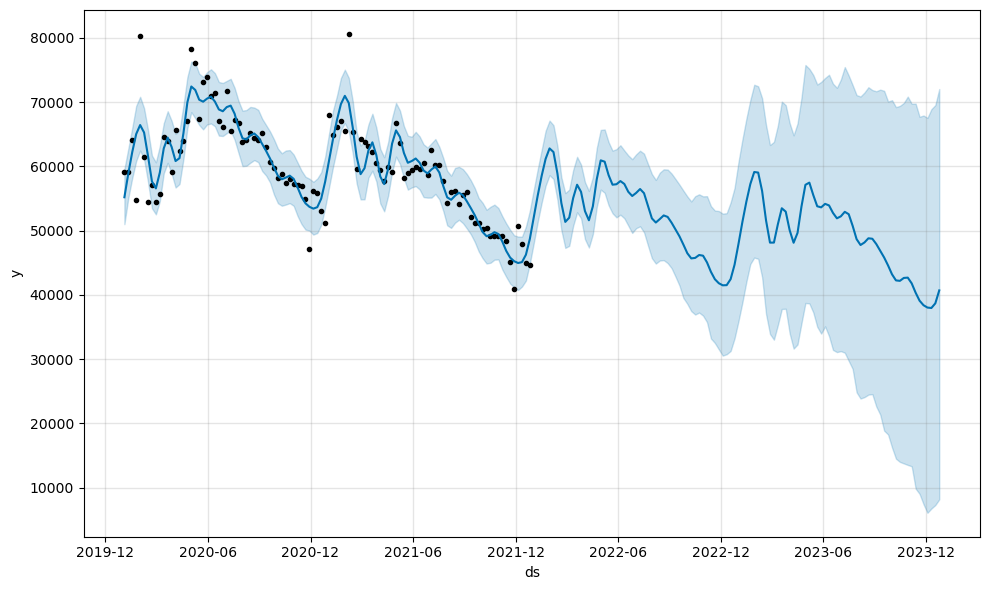

In [56]:
# Generate a new instance of Prophet with the chosen hyperparameters
model_2023 = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.5, seasonality_prior_scale=1.0)
# Fit it to the training data
model_2023.fit(volume_train)
# Make a dataframe for the predictions we want to make (2022), starting with the date
future_2023 = model_2023.make_future_dataframe(periods=104, freq='W-SUN')
# Fill the dataframe with the predictions for that time series
forecast_2023 = model_2023.predict(future_2023)
# Generate Prophet's plot
fig1 = model_2023.plot(forecast_2023)

As we've done previously, we'll generate a new plot to show the observed values against Prophet's forecasts. 

In [57]:
# Isolate the forecasted values into a series so we can easily plot it by itself
temp_forecast_2 = pd.DataFrame(forecast_2023['yhat'][104:])
temp_forecast_2.index = forecast_2023['ds'][104:].values
temp_forecast_2

,yhat
2022-01-02,52058.497781
2022-01-09,55459.460064
2022-01-16,58521.413327
2022-01-23,61153.485589
2022-01-30,62784.597012
...,...
2023-11-26,38389.607123
2023-12-03,38024.357789
2023-12-10,37958.089911
2023-12-17,38680.381323


The mean absolute percentage error of the model graphed below for the first two months of 2023 is 0.099.


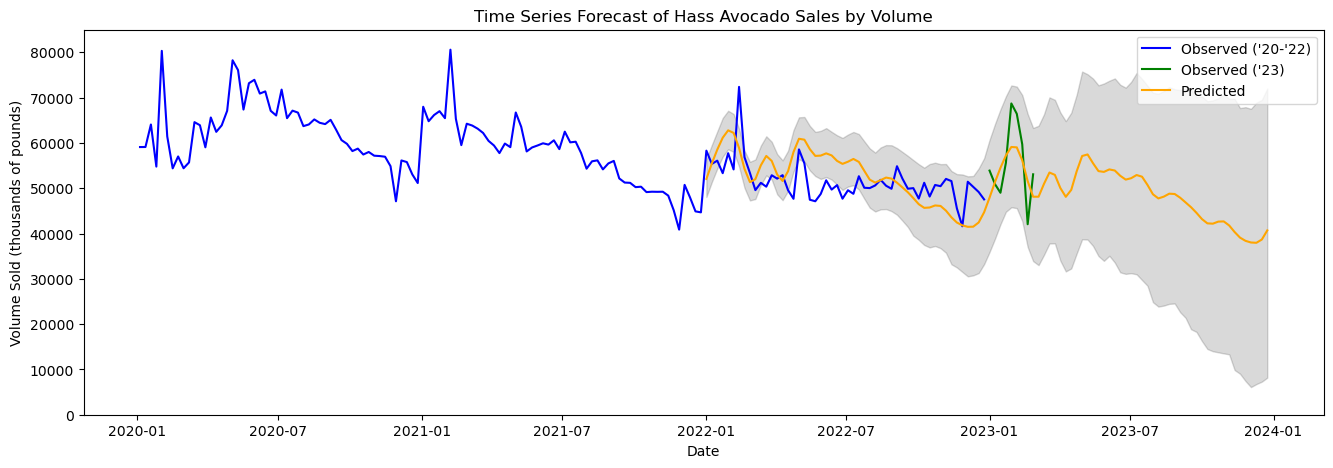

In [58]:
print(f"The mean absolute percentage error of the model graphed below for the first two months of 2023 is {round(mean_absolute_percentage_error(pulled_2023_volume.values, forecast_2023['yhat'][156:165].values), 3)}.")
# Plot the forecast
plt.figure(figsize=[16, 5])
plt.plot(usa_c_volume, color="blue", label="Observed ('20-'22)")
plt.plot(pulled_2023_volume, color="green", label="Observed ('23)")
plt.plot(temp_forecast_2, color="orange", label="Predicted")
plt.fill_between(forecast_2023['ds'][104:], forecast_2023['yhat_lower'][104:], forecast_2023['yhat_upper'][104:], color='k', alpha= 0.15)
plt.title(f"Time Series Forecast of Hass Avocado Sales by Volume")
plt.xlabel("Date")
plt.ylabel("Volume Sold (thousands of pounds)")
plt.legend()
# Zoom in on y axis to see points a little more clearly
plt.ylim(0, 85000);
plt.show()

The mean absolute percentage error (MAPE) for those 9 datapoints (Jan & Feb 2023) is 9.9%. This is a slight degredation in performance from the 2022 forecast's MAPE of 9.2%, around 7.6% higher error score.  While this is still a "highly accurate model" under the definitions explained above, I believe this performance is actually stronger than the MAPE lets on, for two reasons. 

First of all, the model is forecasting further out at this point, with the nearest point of concern being more than 12 months out. In total, the model is being asked to forecast 2 years, based on only 2 years of data on which to train. This sort of ask of any forecasting model borders on unreasonable. 

Secondly, the data considered to be objectively "true" in this case had an unexplained magnitude increase of around +10% from what is represented in the downloaded dataset, which I could not explain. The volume of sales in pounds was reduced by 3.3% to account for only conventional avocado sales (omitting organic sales), reducing some of that unexplained variance in collected values from the Hass Avocado Board. With that reduction, that leaves approximately 7% in increased values from the Hass Avocado Board's dashboards which is unexplained. 

Knowing that the data has deviated by +7% without explanation, and recognizing that this increase has occurred at the largest portion of the year in terms of avocado sales, a deviation of nearly +8% in MAPE for that very distant forecast of 13-14 months seems very consistent, changing by almost the same magnitude as the data itself had changed without explanation. This performance adds additional weight to the conclusion that this model is an effective one for forecasting the volume of sales of conventional Hass avocados in the United States. 

<a id='PartE'></a>
## E: Data Summary and Implications

This analysis began by establishing the following hypotheses:

**Null hypothesis:** An effective predictive time series forecasting model with a mean absolute percentage error of <20% can *not* be generated from the research dataset. <br>
**Alternative hypothesis:** An effective predictive time series forecasting model with a mean absolute percentage error of <20% can be generated from the research dataset.

The final optimized forecasting model, created with prophet, had a mean absolute percentage error (MAPE) of 9.2%. This model easily clears the threshold set in the null hypothesis of 20% or less MAPE. As a result, we reject the null hypothesis in favor of the alternative hypothesis, concluding that it is possible to create an effective time series forecasting model from the research dataset. In fact, while the MAPE threshold was set to a point that would indicate a "good" or perhaps "fine" forecasting model, the MAPE of this final model is actually within a range that it is indicative of a "highly accurate" forecasting model. In this regard, I have to conclude that this project was an unequivocal success in its ability to forecast U.S. sales of conventional Hass avocados by volume. This is especially evidenced by the model's success in forecasting out into a second year (2023), where it maintained similar accuracy in its predictions of data that I manually collected from the Hass Avocado Board's dashboards. 

While I'm very impressed with the model's performance, it must be acknowledged that there are some limitations to this analysis. The biggest limitations relate to the short timeframe involved in this study. Any reader, regardless of whether they are in the United States or not, will recognize that the world changed in 2020 with the beginning of the Covid-19 pandemic, and that led to a number of ripple effects (whether directly resulting from the pandemic or occurring alongside the pandemic) including shipping and logistical issues, increases in inflation of goods, changes in the workforce, and many other changes. The fact that this dataset begins in 2020 might actually make it *more* accurate in its predictions of 2022, 2023, and forward into the future because it avoids being biased by data from prior to the pandemic that may have been very different. Alternatively, this model might only be accurate and relevant for a very brief period of time in its coverage of the pandemic period, if the future reflects something closer to the pre-pandemic period. More alarmingly, this analysis might also be rendered less accurate and relevant if things actually get worse, such as climate change causing damage to California's avocado crops or a new and more destructive wave of Covid-19 (or another pandemic). This is the reality of living in these strange times. 

In terms of a course of action to be taken based upon these results, I think the primary concern here for the Hass Avocado Board is the downward trend for avocado sales over the course of the timeframe in this dataset. Downward trends in sales are oppositional to their stated goal to “help make avocados America’s most popular fruit” and it does not bode well for either growers or marketers. To that end, I would recommend some sort of causal analysis would be in order. This would involve looking at historical data to see if this 2020-2022 trend is part of a bigger-picture problem or a new development, and then an in-depth look into what potential causes may be behind that trend. This is a rather broadly scoped recommendation, but considering the importance of the issue to the Hass Avocado Board and everyone involved in the farming, shipping, and retailing of avocados in the United States, it seems like a project worth taking very seriously. 

Having completed this analysis, I also think there are some other worthwhile analyses that can also be performed with this dataset, or perhaps by joining additional data to it. I considered performing forecasting of price data as a part of this analysis, but the size of this project grew to such an extent that I decided to omit this. However, someone else could likely do a very similar analysis regarding the average sale price per pound from this dataset. The fact that sales of avocados have decreased and the price has increased during the same time frame was a surprising find in my exploratory data analysis, as I had initially expected that the trend for both would be upwards. Especially if supplier data could be acquired, this could possibly indicate a scenario in which the availability of avocados has gone down, leading to decreased sales but increased demand, which could explain a higher price, at least to some extent. 

Another opportunity for additional research into this dataset would be in examining the differences between organic and conventional avocados. I looked into this only briefly enough to note that organic avocados make up a very small proportion of total sales. There would be some difficulty here in comparing between organic and conventional avocados given the disparity in volume of sales for the two, however I can see where it might be possible to gain some insight into how the price of organic avocados vs conventional may impact the sales of each. 

A final avenue for more advanced research could be to evaluate sales on a per-market or per-region basis to identify where there may be opportunities for additional growth in the avocado market (or problems to be addressed). For example, if the California region is known to have increased in population by 5% from 2020 - 2022, and avocado sales have remained static, this indicates an opportunity for growth in that particular region. We can imagine that a given percentage of people enjoy avocados and would buy them, and if the population has increased but sales have not, presumably this means that a percentage of people who do (or would) enjoy avocados are not buying them. If avocado sales have actually decreased in this interval for that region, this could indicate some sort of problem that merits further examination or review. This sort of analysis could be performed on any (or all) of the 50 markets or 8 regions in the dataset.

<a id='PartF'></a>
## F: Source References

[Hass Avocado Board: Category Data](https://hassavocadoboard.com/category-data/) is the source for this dataset. When applying filtering to isolate 2020, 2021, or 2022 data, at the bottom right of several windows within the dashboard, an option will display to download the "Weekly Retail Volume & Price Report".

[Pythonista Planet: Disadvantages of Python](https://pythonistaplanet.com/disadvantages-of-python/#:~:text=The%20main%20disadvantages%20of%20Python%20are%20its%20slowness%20during%20execution,in%20the%20enterprise%20development%20sector.) was used to find a disadvantage of Python. 

[Colorado State University - Food Source Information](https://fsi.colostate.edu/avocados/) and [Wikipedia - List of Countries by Avocado Production](https://en.wikipedia.org/wiki/List_of_countries_by_avocado_production) were both used for observations regarding where Avocados come from, as it relates to how this could impact prices. 

[Prophet Documentation: Hyperparameter Tuning](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning) was used for both the code used in the tuning process, as well as the descriptions in this report of what each of the hyperparameters do. 

[Stephen Allwright: What is a good MAPE score?](https://stephenallwright.com/good-mape-score/), [Cross Validated: Is there any standard of a good forecast measured by SMAPE?](https://stats.stackexchange.com/questions/473716/is-there-any-standard-criteria-of-good-forecast-measured-by-smape-and-mase), and [C.D. Lewis: Industrial and Business Forecasting Methods (1982)](https://onlinelibrary.wiley.com/doi/10.1002/for.3980020210) were used for justifying evaluation of the model's MAPE score. 

[Hass Avocado Board: Volume Data Dashboards](https://hassavocadoboard.com/volume-data-projections/) was used for gathering weekly volume data in 2023, to form a rough comparison for the 2023 model forecast. 

<a id='PartG'></a>
## G: Code References

[StackOverflow: Pandas CASE/WHEN/DEFAULT](https://stackoverflow.com/questions/49228596/pandas-case-when-default-in-pandas) was used for populating the region fields of the market_df with a vectorized approach, as this task amounted to a large CASE/WHEN statement. 

[Brendan Artley @ Towards Data Science: Time Series Analysis](https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6) had a great tutorial on using `pmdarima`and the `auto_arima()` function. I ended up using his auto_arima() code with minimal modifications, though I had to heavily modify the defined forecast() function to meet my own needs in this project. 

[Prophet](https://facebook.github.io/prophet/) was used for generating the final time series analysis, especially [their tutorial of how to perform hyperparameter tuning](https://facebook.github.io/prophet/docs/diagnostics.html#cross-validation) to create my final model. 